# TCGA RNA-Seq Cancer Type Prediction

This notebook demonstrates how to use TCGA RNA-seq expression data to predict cancer types. We will walk through the following steps:
1.  **Data Loading and Preprocessing**: We'll load the dataset, separate features and labels, encode categorical data, and split it into training and testing sets.
2.  **Training Traditional Machine Learning Models**: We will train and evaluate three common classifiers:
    *   Random Forest
    *   Decision
    *   Logistic Regression


## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score, f1_score
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv('/content/rna_seq_with_column_names.csv')
print("Dataset loaded successfully.")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset loaded successfully.
Shape of the dataset: (8870, 12857)

First 5 rows of the dataset:


,100133144,100134869,155060,340602,388795,390284,553137,57714,645851,652919,...,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZYG11A,ZYX,sample,tumor_status,cancer_type
0,2.03,2.96,7.87,2.03,0.00,1.16,0.0,9.07,4.53,4.43,...,8.75,9.51,8.03,8.66,6.05,0.69,11.92,TCGA-02-0047-01,Primary Tumor,glioblastoma multiforme
1,0.00,4.06,7.35,0.00,1.42,2.30,0.0,7.96,3.61,2.62,...,5.67,9.13,8.87,7.95,5.45,2.60,13.49,TCGA-02-0055-01,Primary Tumor,glioblastoma multiforme
2,1.98,3.90,7.09,0.88,0.00,1.43,0.0,7.43,4.70,0.00,...,7.79,8.87,9.42,9.39,4.35,5.50,12.31,TCGA-02-2483-01,Primary Tumor,glioblastoma multiforme
3,4.09,4.00,8.71,1.54,0.97,0.97,0.0,7.09,5.55,0.00,...,7.89,9.46,8.79,8.79,5.78,0.00,12.31,TCGA-02-2485-01,Primary Tumor,glioblastoma multiforme
4,2.71,2.54,8.11,1.15,1.15,1.15,0.0,8.48,3.43,0.00,...,6.64,8.66,7.39,6.24,5.03,0.00,12.93,TCGA-02-2486-01,Primary Tumor,glioblastoma multiforme


## Data Preprocessing

In [3]:
# Features (X) are all columns starting with 'V'
exclude_cols = ['sample', 'tumor_status', 'cancer_type']
features = [col for col in df.columns if col not in exclude_cols]
X = df[features]

# Target (y) is the 'cancer_type' column
y = df['cancer_type']

print(f"Number of features (genes): {len(features)}")
print(f"Number of samples: {len(df)}")
print(f"Number of unique cancer types: {y.nunique()}")
print("\nCancer Types Distribution:")
print(y.value_counts())

# Encode string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData splitting and scaling complete.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Number of features (genes): 12854
Number of samples: 8870
Number of unique cancer types: 32

Cancer Types Distribution:
cancer_type
breast invasive carcinoma                1211
kidney clear cell carcinoma               605
lung adenocarcinoma                       574
thyroid carcinoma                         564
head & neck squamous cell carcinoma       564
lung squamous cell carcinoma              554
brain lower grade glioma                  516
prostate adenocarcinoma                   516
bladder urothelial carcinoma              427
liver hepatocellular carcinoma            421
colon adenocarcinoma                      327
kidney papillary cell carcinoma           322
cervical & endocervical cancer            308
sarcoma                                   261
uterine corpus endometrioid carcinoma     200
pancreatic adenocarcinoma                 182
pheochromocytoma & paraganglioma          182
glioblastoma multiforme                   161
testicular germ cell tumor              

# Part 1: Traditional Machine Learning Models
We will now train and evaluate three classic machine learning models. We will calculate Accuracy, Macro F1-Score, Matthews Correlation Coefficient (MCC), and the ROC AUC score, which are more informative for imbalanced datasets than accuracy alone.

### Random Forest Classifier (Capped)

In [4]:
print("--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=5)
rf_model.fit(X_train_scaled, y_train)

# Predictions and Probability Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)


--- Training Random Forest Classifier ---


In [5]:
from sklearn.metrics import cohen_kappa_score, balanced_accuracy_score

# Accuracy: Overall correctness of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# F1-Score (Macro): Unweighted mean of the F1-score per class. Treats all classes equally.
f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)
# F1-Score (Weighted): F1-score per class, weighted by support. Accounts for imbalance.
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
# F1-Score (Micro): Global F1-score, equivalent to accuracy.
f1_micro_rf = f1_score(y_test, y_pred_rf, average='micro', zero_division=0)

# Matthews Correlation Coefficient (MCC): A robust metric for imbalanced classes.
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
# Balanced Accuracy: The average of recall for each class.
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
# Cohen's Kappa: Measures inter-rater agreement, correcting for chance.
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


# ROC AUC Score (One-vs-One): Area under the curve, averaged over all pairwise class combinations.
roc_auc_ovo_rf = roc_auc_score(y_test, y_proba_rf, multi_class='ovo', labels=np.arange(len(class_names)))


print("\n--- Performance Metrics ---")
print(f"Accuracy:                             {accuracy_rf:.4f}")
print(f"Balanced Accuracy:                    {balanced_acc_rf:.4f}")
print(f"Macro F1-Score:                       {f1_macro_rf:.4f}")
print(f"Weighted F1-Score:                    {f1_weighted_rf:.4f}")
print(f"Micro F1-Score:                       {f1_micro_rf:.4f}")
print(f"Matthews Correlation Coefficient:     {mcc_rf:.4f}")
print(f"Cohen's Kappa Score:                  {kappa_rf:.4f}")
print(f"ROC AUC Score (One-vs-One):           {roc_auc_ovo_rf:.4f}\n")


print("--- Full Classification Report ---")
print(classification_report(y_test, y_pred_rf, labels=np.arange(len(class_names)), target_names=class_names, zero_division=0))


--- Performance Metrics ---
Accuracy:                             0.7678
Balanced Accuracy:                    0.4818
Macro F1-Score:                       0.4761
Weighted F1-Score:                    0.7155
Micro F1-Score:                       0.7678
Matthews Correlation Coefficient:     0.7560
Cohen's Kappa Score:                  0.7502
ROC AUC Score (One-vs-One):           0.9881

--- Full Classification Report ---
                                       precision    recall  f1-score   support

                adrenocortical cancer       1.00      0.06      0.12        16
         bladder urothelial carcinoma       0.89      0.59      0.71        85
             brain lower grade glioma       0.99      1.00      1.00       103
            breast invasive carcinoma       0.72      1.00      0.84       242
       cervical & endocervical cancer       1.00      0.02      0.03        62
                   cholangiocarcinoma       0.00      0.00      0.00         9
                 colo

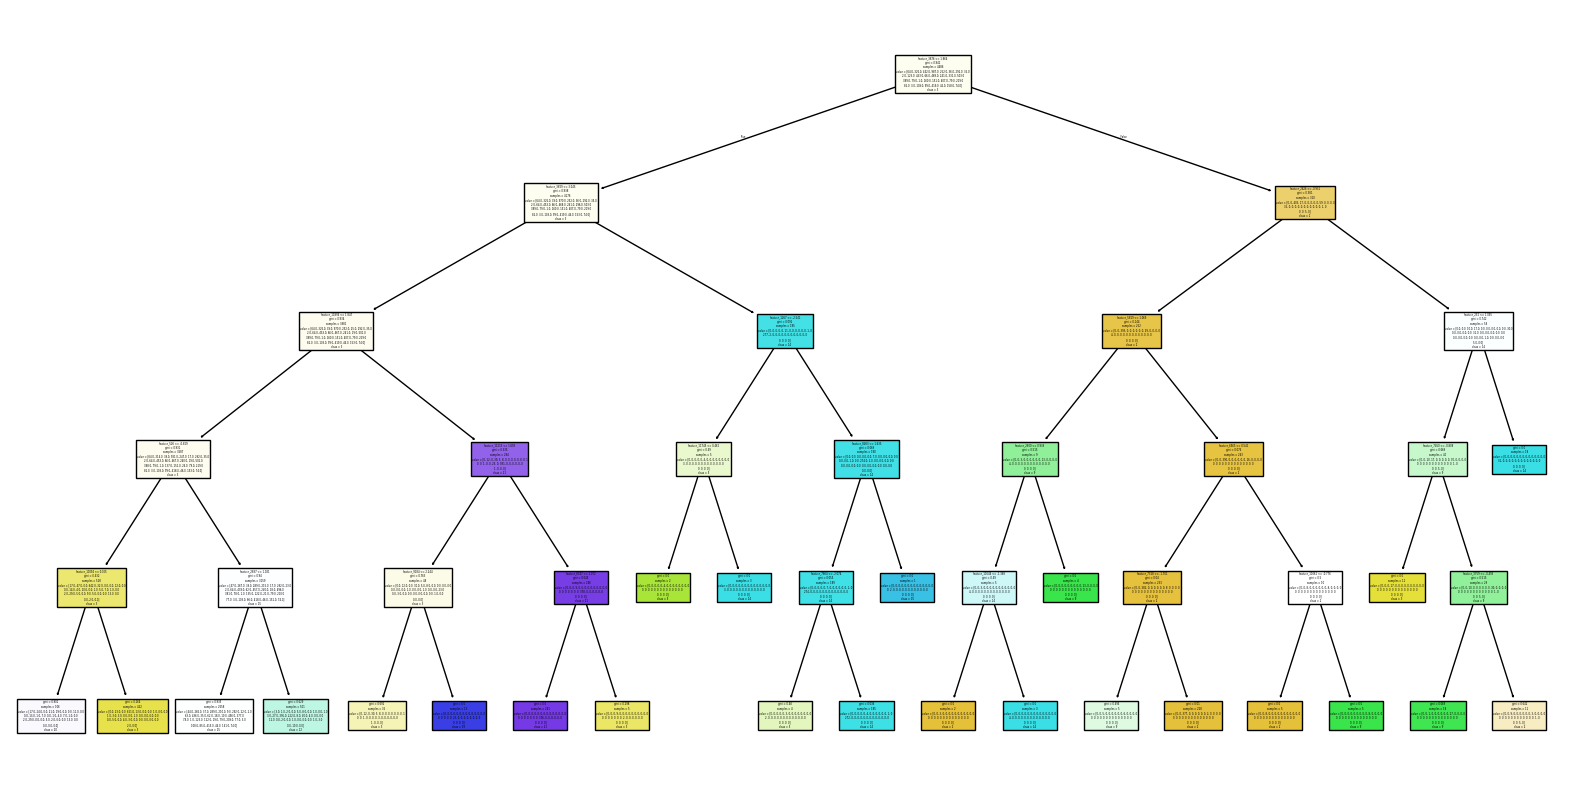

In [6]:
from sklearn import tree

feature_names = [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    rf_model.estimators_[0],
    feature_names=feature_names,
    class_names=[str(c) for c in rf_model.classes_],
    filled=True
)
plt.show()


### Logistic Regression

In [7]:
# --- Imports for additional metrics ---
from sklearn.metrics import cohen_kappa_score, balanced_accuracy_score, roc_auc_score, f1_score

print("--- Training Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)

# Predictions and Probability Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)

# --- Expanded Evaluation ---

# Accuracy: Overall correctness of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# F1-Score (Macro): Unweighted mean of the F1-score per class. Treats all classes equally.
f1_macro_lr = f1_score(y_test, y_pred_lr, average='macro', zero_division=0)

# F1-Score (Weighted): F1-score per class, weighted by support. Accounts for imbalance.
f1_weighted_lr = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

# F1-Score (Micro): Global F1-score, equivalent to accuracy.
f1_micro_lr = f1_score(y_test, y_pred_lr, average='micro', zero_division=0)

# Matthews Correlation Coefficient (MCC): A robust metric for imbalanced classes.
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)

# Balanced Accuracy: The average of recall for each class.
balanced_acc_lr = balanced_accuracy_score(y_test, y_pred_lr)

# Cohen's Kappa: Measures inter-rater agreement, correcting for chance.
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)

# ROC AUC Score (One-vs-One)
roc_auc_ovo_lr = roc_auc_score(y_test, y_proba_lr, multi_class='ovo', labels=np.arange(len(class_names)))


print("\n--- Performance Metrics ---")
print(f"Accuracy:                             {accuracy_lr:.4f}")
print(f"Balanced Accuracy:                    {balanced_acc_lr:.4f}")
print(f"Macro F1-Score:                       {f1_macro_lr:.4f}")
print(f"Weighted F1-Score:                    {f1_weighted_lr:.4f}")
print(f"Micro F1-Score:                       {f1_micro_lr:.4f}")
print(f"Matthews Correlation Coefficient:     {mcc_lr:.4f}")
print(f"Cohen's Kappa Score:                  {kappa_lr:.4f}")
print(f"ROC AUC Score (One-vs-One):           {roc_auc_ovo_lr:.4f}\n")


print("--- Full Classification Report ---")
print(classification_report(y_test, y_pred_lr, labels=np.arange(len(class_names)), target_names=class_names, zero_division=0))

--- Training Logistic Regression ---

--- Performance Metrics ---
Accuracy:                             0.9651
Balanced Accuracy:                    0.9370
Macro F1-Score:                       0.9425
Weighted F1-Score:                    0.9644
Micro F1-Score:                       0.9651
Matthews Correlation Coefficient:     0.9629
Cohen's Kappa Score:                  0.9629
ROC AUC Score (One-vs-One):           0.9980

--- Full Classification Report ---
                                       precision    recall  f1-score   support

                adrenocortical cancer       1.00      1.00      1.00        16
         bladder urothelial carcinoma       0.98      0.99      0.98        85
             brain lower grade glioma       1.00      1.00      1.00       103
            breast invasive carcinoma       1.00      1.00      1.00       242
       cervical & endocervical cancer       0.91      0.95      0.93        62
                   cholangiocarcinoma       1.00      0.44     

### Decision Tree

In [8]:
# --- Imports for Decision Tree and additional metrics ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score, balanced_accuracy_score, roc_auc_score, f1_score

print("--- Training Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Predictions and Probability Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)

# --- Expanded Evaluation ---

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# F1-Scores
f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro', zero_division=0)
f1_weighted_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_micro_dt = f1_score(y_test, y_pred_dt, average='micro', zero_division=0)

# Matthews Correlation Coefficient (MCC)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Balanced Accuracy
balanced_acc_dt = balanced_accuracy_score(y_test, y_pred_dt)

# Cohen's Kappa
kappa_dt = cohen_kappa_score(y_test, y_pred_dt)

# ROC AUC Scores
roc_auc_ovr_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr', labels=np.arange(len(class_names)))
roc_auc_ovo_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovo', labels=np.arange(len(class_names)))


print("\n--- Performance Metrics ---")
print(f"Accuracy:                             {accuracy_dt:.4f}")
print(f"Balanced Accuracy:                    {balanced_acc_dt:.4f}")
print(f"Macro F1-Score:                       {f1_macro_dt:.4f}")
print(f"Weighted F1-Score:                    {f1_weighted_dt:.4f}")
print(f"Micro F1-Score:                       {f1_micro_dt:.4f}")
print(f"Matthews Correlation Coefficient:     {mcc_dt:.4f}")
print(f"Cohen's Kappa Score:                  {kappa_dt:.4f}")
print(f"ROC AUC Score (One-vs-Rest):          {roc_auc_ovr_dt:.4f}")
print(f"ROC AUC Score (One-vs-One):           {roc_auc_ovo_dt:.4f}\n")


print("--- Full Classification Report ---")
print(classification_report(y_test, y_pred_dt, labels=np.arange(len(class_names)), target_names=class_names, zero_division=0))

--- Training Decision Tree Classifier ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(



--- Performance Metrics ---
Accuracy:                             0.4515
Balanced Accuracy:                    0.2081
Macro F1-Score:                       0.1840
Weighted F1-Score:                    0.3918
Micro F1-Score:                       0.4515
Matthews Correlation Coefficient:     0.4804
Cohen's Kappa Score:                  0.4074
ROC AUC Score (One-vs-Rest):          nan
ROC AUC Score (One-vs-One):           0.6750

--- Full Classification Report ---
                                       precision    recall  f1-score   support

                adrenocortical cancer       0.00      0.00      0.00        16
         bladder urothelial carcinoma       0.00      0.00      0.00        85
             brain lower grade glioma       0.00      0.00      0.00       103
            breast invasive carcinoma       0.98      0.90      0.94       242
       cervical & endocervical cancer       0.00      0.00      0.00        62
                   cholangiocarcinoma       0.00      0.00

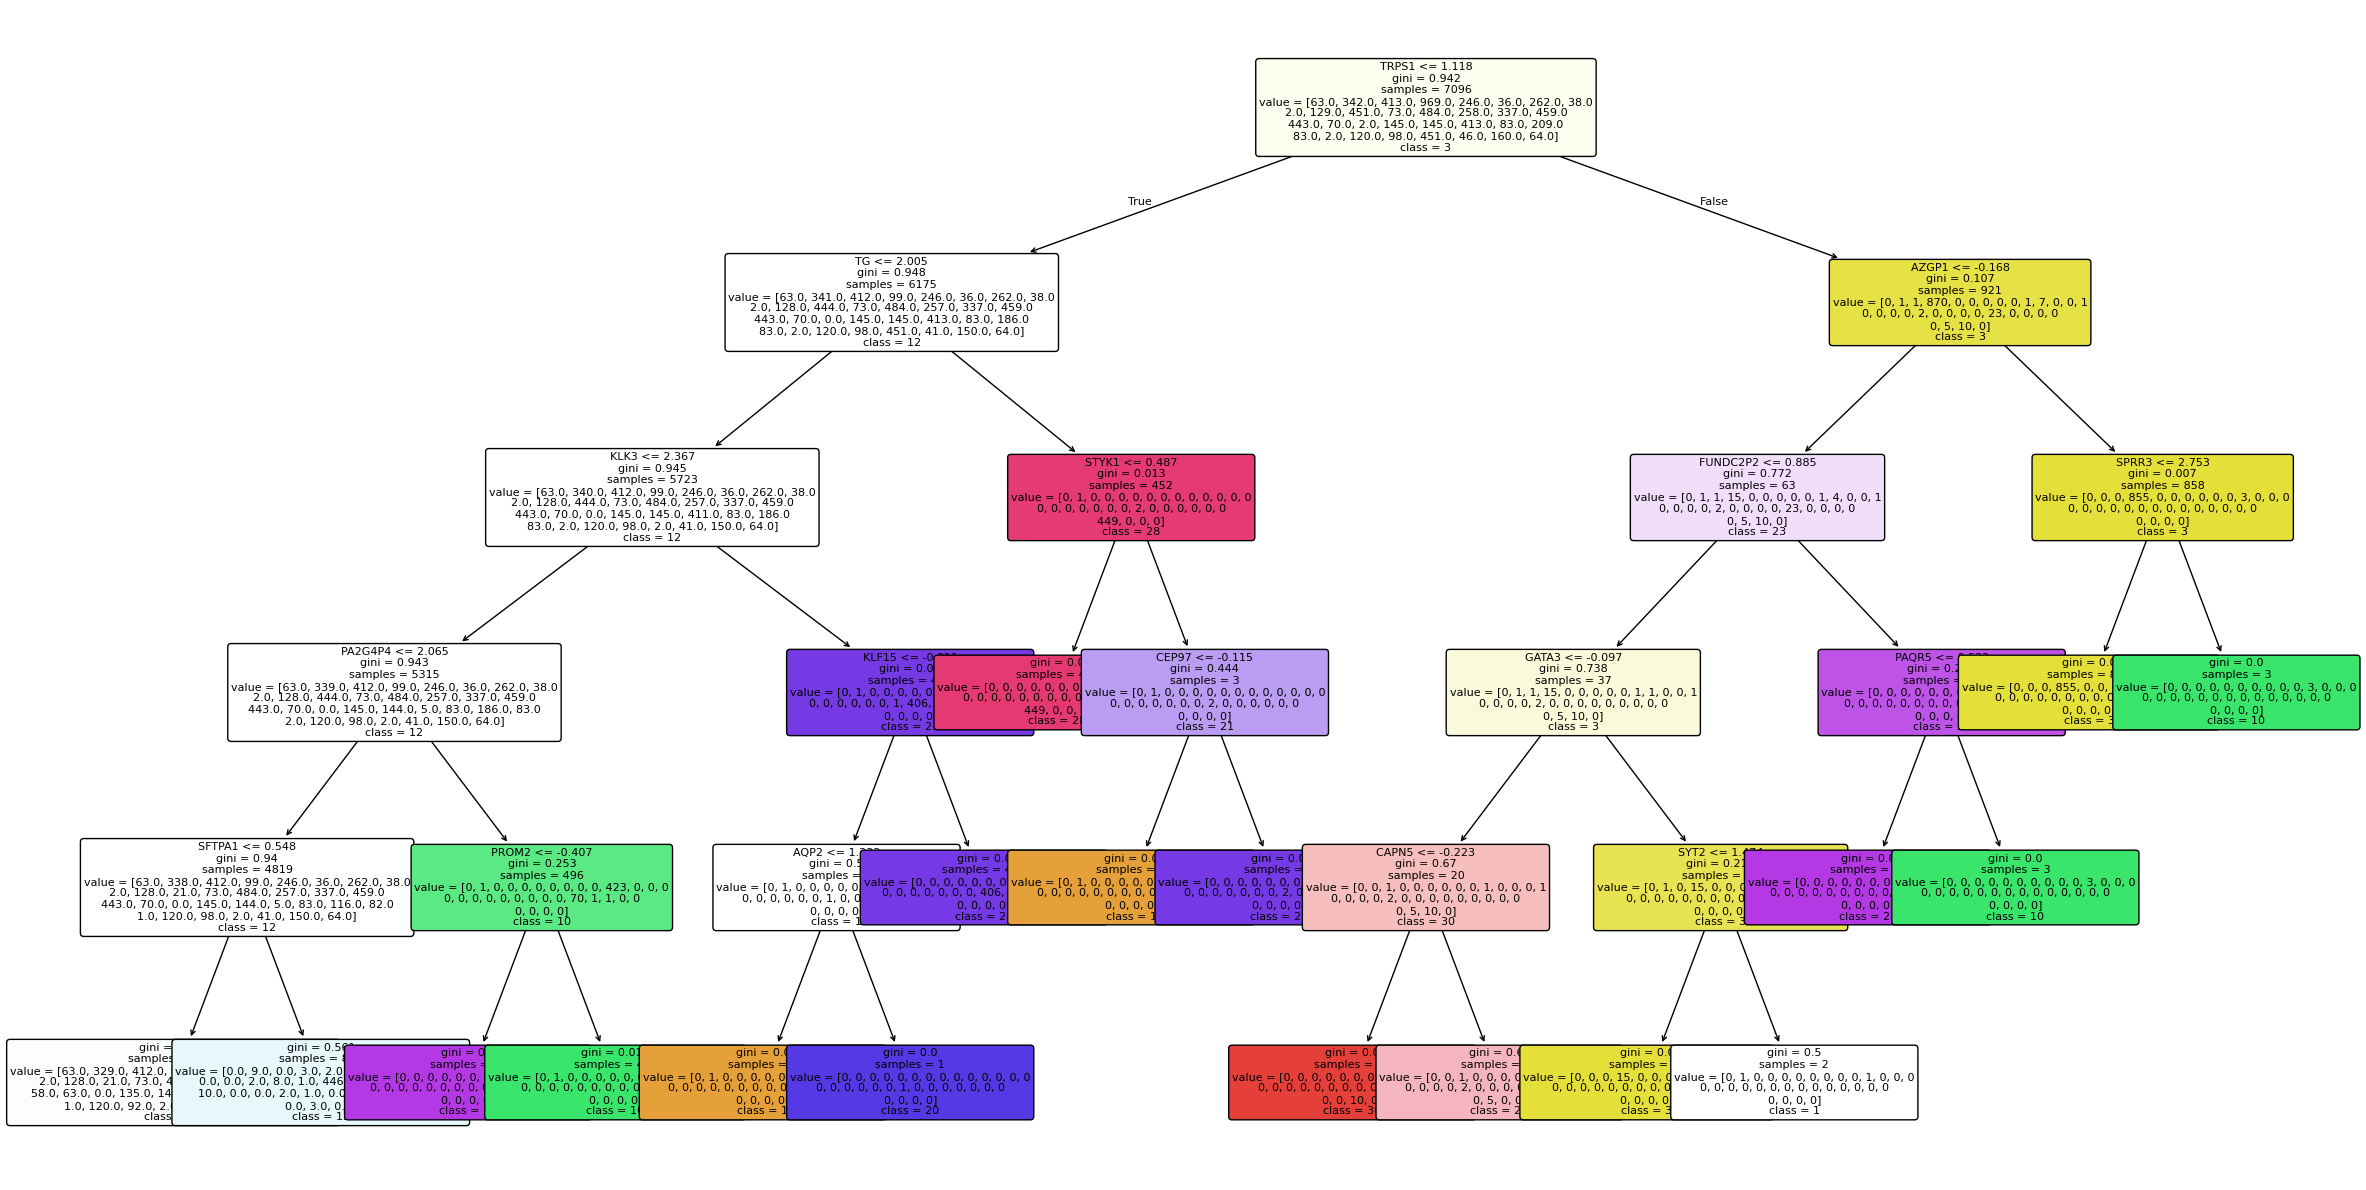

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# --- Feature & class names (robust to NumPy arrays) ---
try:
    feature_names = list(X_train.columns)          # if you kept the original DF
except Exception:
    feature_names = [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

class_names = [str(c) for c in getattr(dt_model, "classes_", np.unique(y_train))]

# --- Quick matplotlib plot (cap depth to keep it readable) ---
plt.figure(figsize=(24, 12))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,       # increase/remove if you want the full tree
    fontsize=8
)
plt.tight_layout()
plt.show()


## Data analysis

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Aggregate the main performance metrics into a dictionary ---
# (Using the values you provided from your model runs)
metrics_data = {
    'Model': [
        'Random Forest', 'Logistic Regression', 'Decision Tree',
        'Random Forest', 'Logistic Regression', 'Decision Tree',
        'Random Forest', 'Logistic Regression', 'Decision Tree',
        'Random Forest', 'Logistic Regression', 'Decision Tree',
        'Random Forest', 'Logistic Regression', 'Decision Tree'
    ],
    'Metric': [
        'Accuracy', 'Accuracy', 'Accuracy',
        'Balanced Accuracy', 'Balanced Accuracy', 'Balanced Accuracy',
        'Macro F1-Score', 'Macro F1-Score', 'Macro F1-Score',
        'MCC', 'MCC', 'MCC',
        'ROC AUC (OvO)', 'ROC AUC (OvO)', 'ROC AUC (OvO)'
    ],
    'Score': [
        accuracy_rf, accuracy_lr, accuracy_dt,
        balanced_acc_rf, balanced_acc_lr, balanced_acc_dt,
        f1_macro_rf, f1_macro_lr, f1_macro_dt,
        mcc_rf, mcc_lr, mcc_dt,
        roc_auc_ovo_rf, roc_auc_ovo_lr, roc_auc_ovo_dt
    ]
}

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics_data)


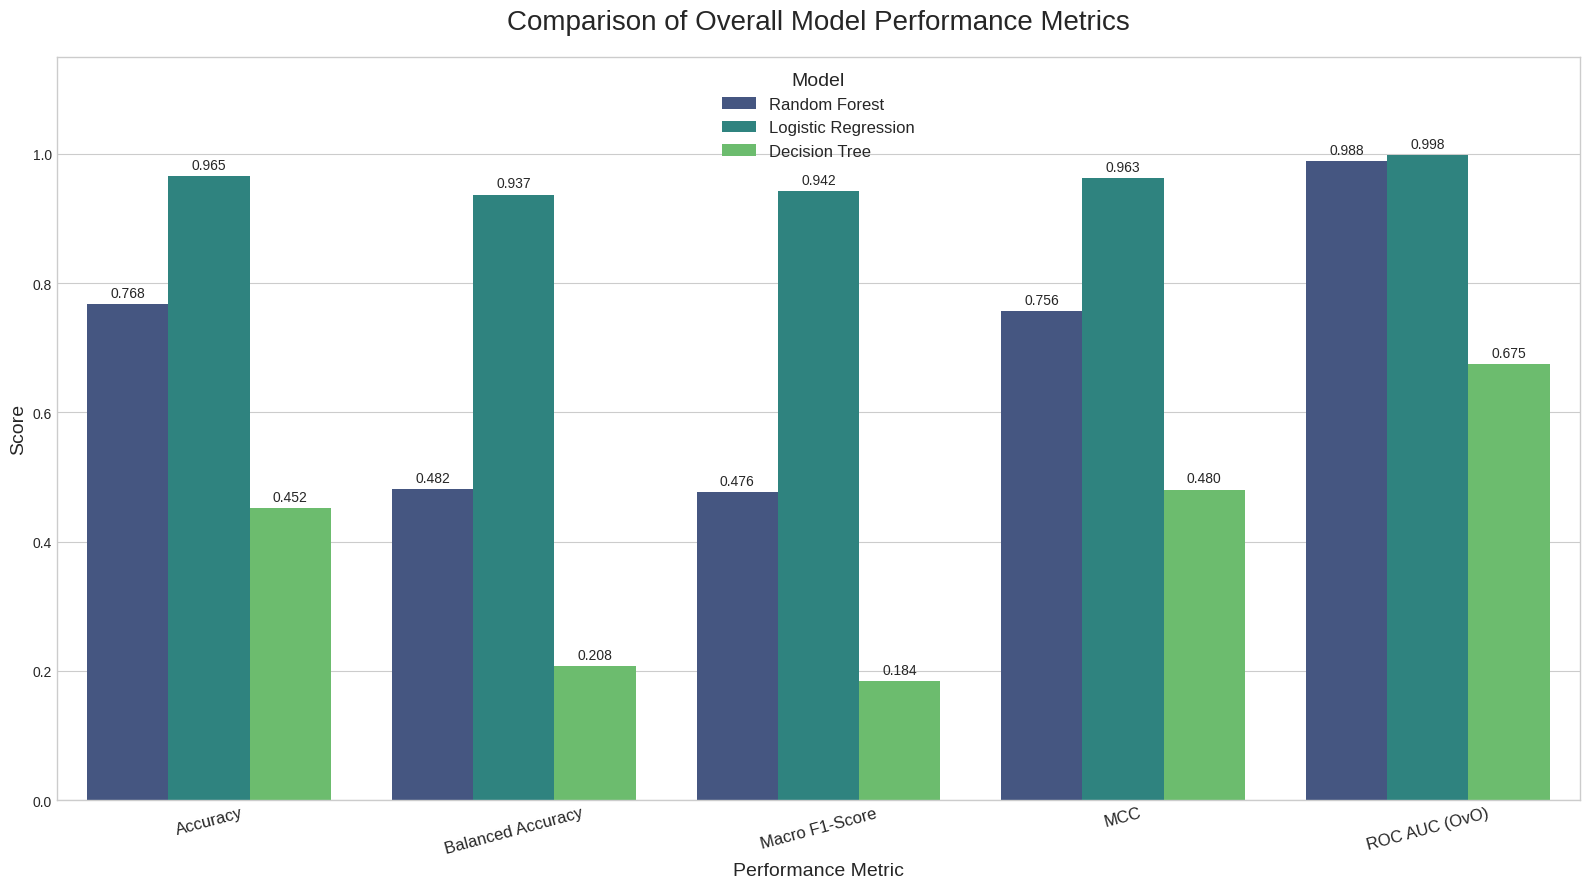

In [11]:
# --- Create the bar plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 9))

# Use seaborn to create a grouped bar plot
sns.barplot(data=metrics_df, x='Metric', y='Score', hue='Model', ax=ax, palette='viridis')

# --- Add annotations (text labels) on top of each bar ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10, padding=3)

# --- Customize the plot ---
ax.set_title('Comparison of Overall Model Performance Metrics', fontsize=20, pad=20)
ax.set_xlabel('Performance Metric', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_ylim(0, 1.15)  # Set y-axis limit to give space for labels
ax.tick_params(axis='x', rotation=15, labelsize=12)
ax.legend(title='Model', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#SHAP

Summary of the findings:


- BEFORE removing Gene specific with Y chromosome
  - Testicular Germ Cell Tumor: (Male-exclusive)
  - ['RPS4Y1', 'DDX3Y', 'KDM5D', 'USP9Y', 'EIF1AY']
-this list consists entirely of genes from the Y chromosome,
  - Breast Invasive Carcinoma: (Female-predominant)
  - ['RPS4Y1', 'XIST', 'DDX3Y', 'KDM5D', 'EIF1AY']
- This list is dominated by the female-marker XIST and several Y-chromosome genes
- Note: 'RPS4Y1' appears in here because SHAP sees the absence of gene as a major contributing factor
_________________________________________________________________________
 AFTER
- Testicular Germ Cell Tumor: ['PRAME', 'GSTA2', 'AFP', 'L1TD1', 'NLGN4Y']
  - AFP (Alpha-fetoprotein): clinical biomarker used to diagnose and monitor testicular cancer.
  - L1TD1: A protein critical for maintaining pluripotency (the ability to become any cell type),
  - PRAME: A cancer-testis antigen
  - GSTA2: Involved in detoxification, often linked to chemotherapy resistance in cancers.
- Breast Invasive Carcinoma: ['NLGN4Y', 'IRX1', 'TCF21', 'SCGB2A2', 'AZGP1']
  - SCGB2A2 (Mammaglobin-B): A secretoglobin protein. Its relative, Mammaglobin-A, is highly expressed in breast tissue and studied as a marker
 - AZGP1: A protein secreted by epithelial cells in glandular tissues, including the breast.


In [12]:
import shap

In [13]:
explainer = shap.LinearExplainer(lr_model, X_train)
shap_values = explainer.shap_values(X_test[:500])

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of SHAP values: {shap_values.shape}")

Shape of X_test: (1774, 12854)
Shape of SHAP values: (500, 12854, 32)


##Logistic Regression based SHAP for baseline accuracy

LR Gene per Cancer type **(WITH X&Y CHROMOSOME)**

In [14]:
import numpy as np

# A dictionary to store the top N genes for each class
top_genes_per_class = {}
N = 5 # Let's find the top 5 genes for each class

# Iterate through the classes (the third dimension of shap_values)
# shap_values shape: (samples, features, classes)
for i in range(shap_values.shape[2]):
    # Calculate the mean absolute SHAP value for each gene across all samples for the current class
    global_importance = np.mean(np.abs(shap_values[:, :, i]), axis=0)

    # Create a DataFrame for easy sorting
    importance_df = pd.DataFrame({
        'Gene': X.columns,
        'SHAP_Importance': global_importance
    })

    # Sort by importance and get the top N genes
    top_genes = importance_df.sort_values(by='SHAP_Importance', ascending=False).head(N)

    # Store the results using the actual class name
    class_name = class_names[i]
    top_genes_per_class[class_name] = top_genes['Gene'].tolist()

# Print the top genes for all classes
for class_name, genes in top_genes_per_class.items():
    print(f" {class_name}: {genes}")

 0: ['KRT19', 'DLK1', 'DES', 'IGF2', 'CHRDL1']
 1: ['MUC5B', 'IRX2', 'UPK1B', 'TCF21', 'PITX2']
 2: ['653553', 'FTHL3', 'LOC644936', 'GCSH', 'RPL13AP3']
 3: ['RPS4Y1', 'XIST', 'DDX3Y', 'KDM5D', 'EIF1AY']
 4: ['RPS4Y1', 'XIST', 'DDX3Y', 'KDM5D', 'EIF1AY']
 5: ['GSTT1', 'RPS27', 'GSTM1', 'XPNPEP2', 'SFRP5']
 6: ['PRAC', 'HOXA9', 'MAB21L2', 'CLDN8', 'HOXC6']
 7: ['KRT19', 'TRIM29', 'ANXA8', 'GPRC5A', 'DKK1']
 8: ['KRT4', 'SPRR3', 'COL11A1', 'A2ML1', 'C20orf114']
 9: ['653553', 'FTHL3', 'LOC644936', 'RPL13AP3', 'RPS4Y1']
 10: ['RPS4Y1', 'DDX3Y', 'XIST', 'KDM5D', 'EIF1AY']
 11: ['RPS4Y1', 'XIST', 'DDX3Y', 'KDM5D', 'KRT5']
 12: ['LOC100271831', 'LOC440173', 'HMGCS2', 'REN', 'FGB']
 13: ['XIST', 'KRT6A', 'KRT16', 'KRT13', 'GPR110']
 14: ['ALB', 'CRP', 'GSTT1', 'FGL1', 'GATA4']
 15: ['SFTPB', 'DSG3', 'CALML3', 'KRT6A', 'KRT14']
 16: ['SFTPB', 'SFTPA2', 'SFTPA1', 'KRT6A', 'CALML3']
 17: ['XIST', 'RPS4Y1', 'KDM5D', 'DDX3Y', 'ITLN1']
 18: ['MUC16', 'PAEP', 'KLK7', 'WT1', 'DAPL1']
 19: ['SST', 'TT

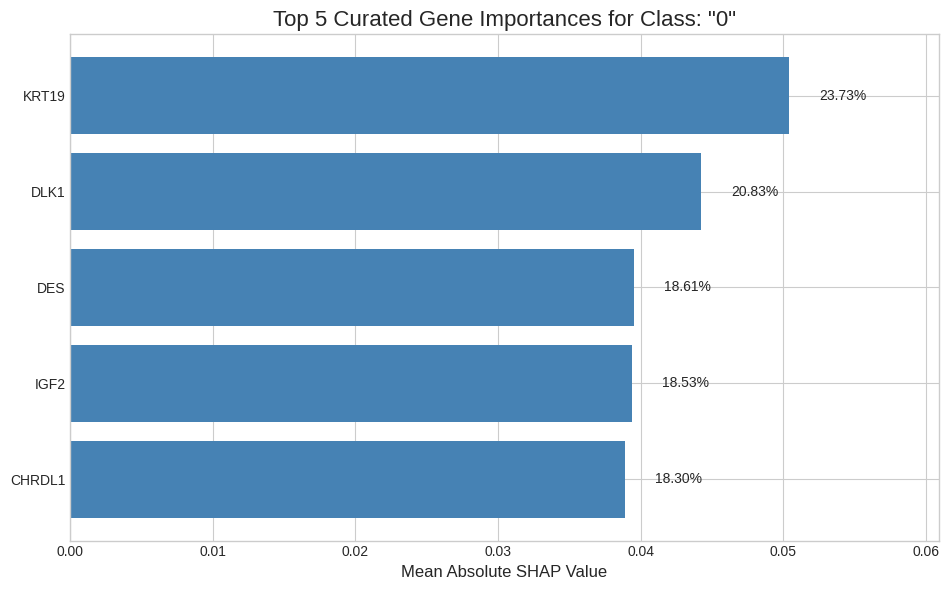

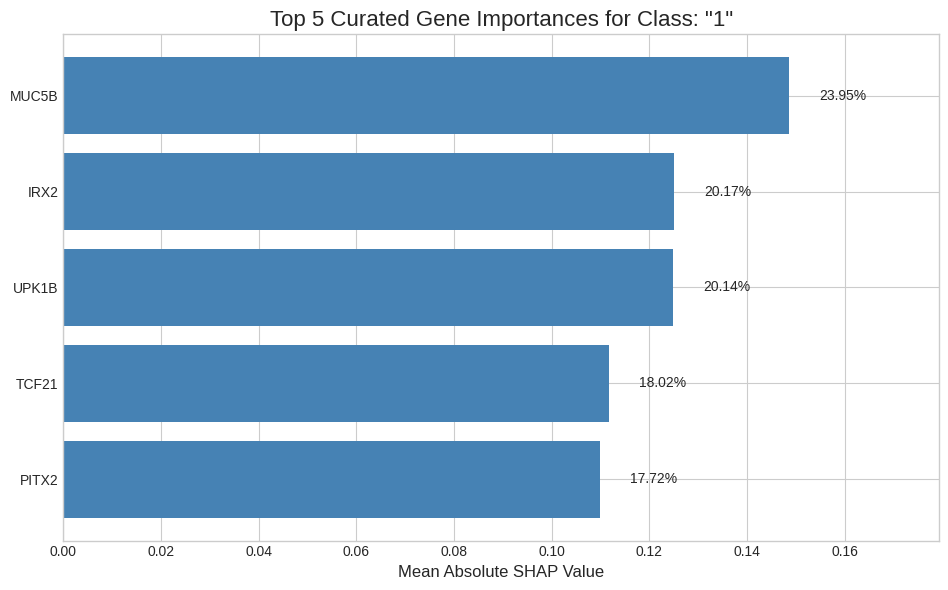

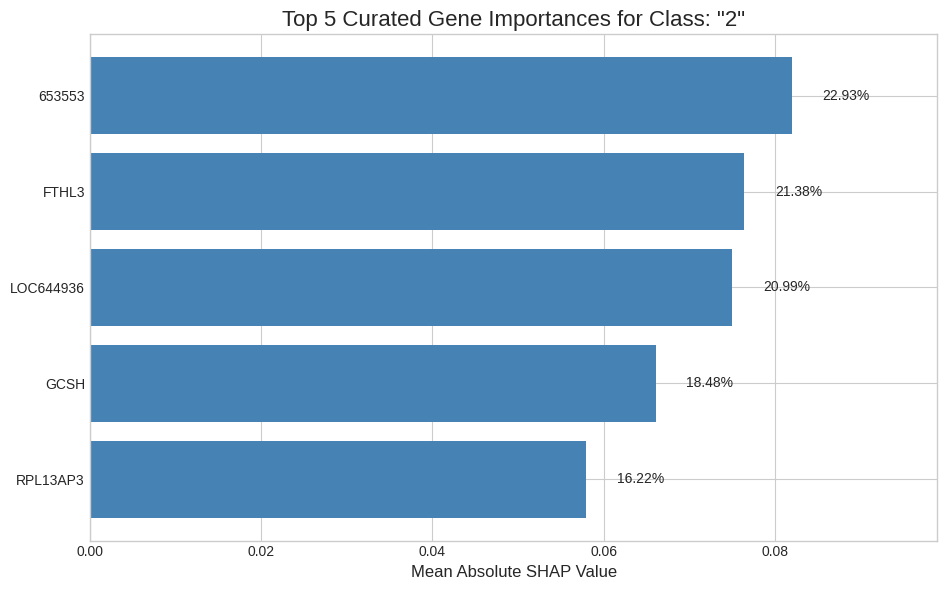

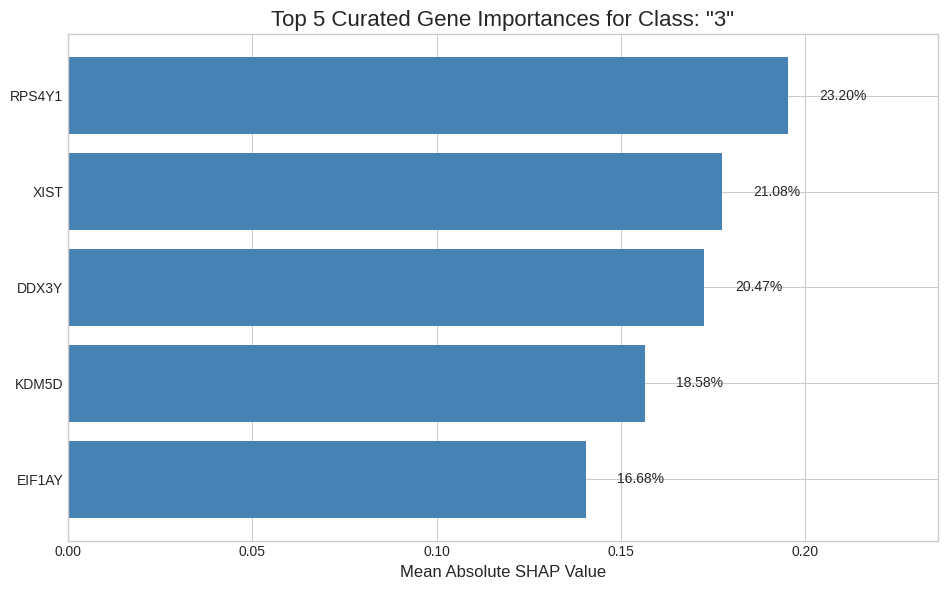

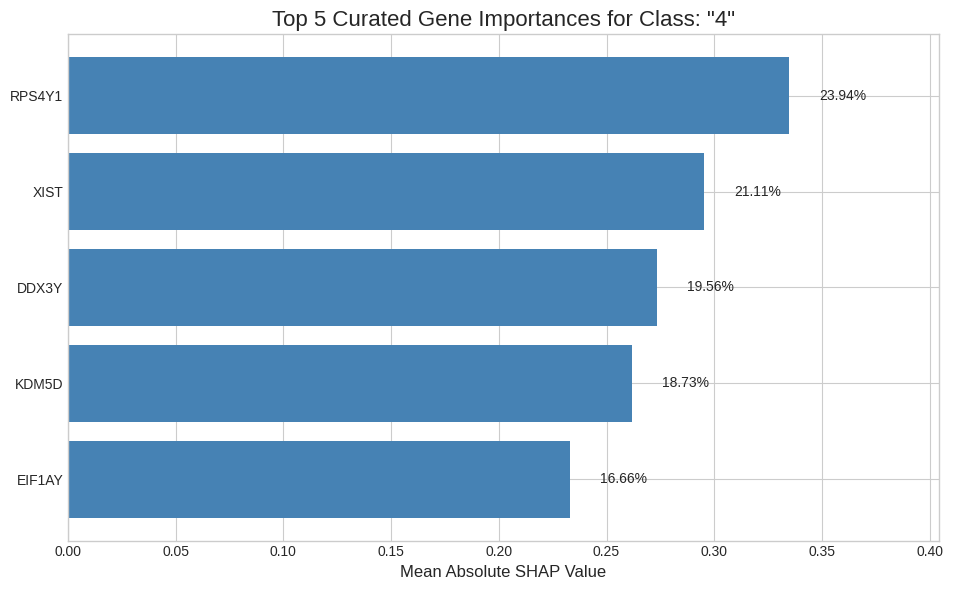

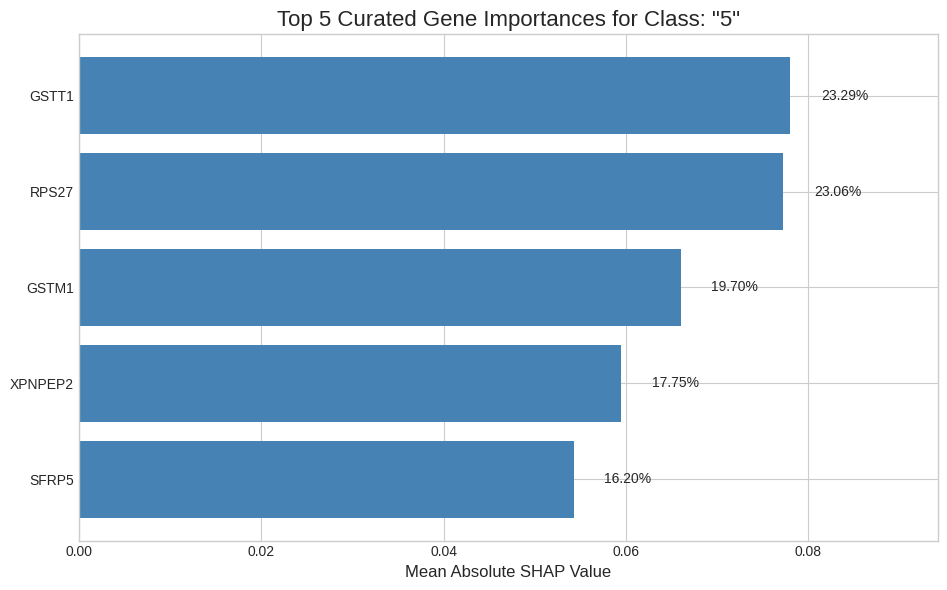

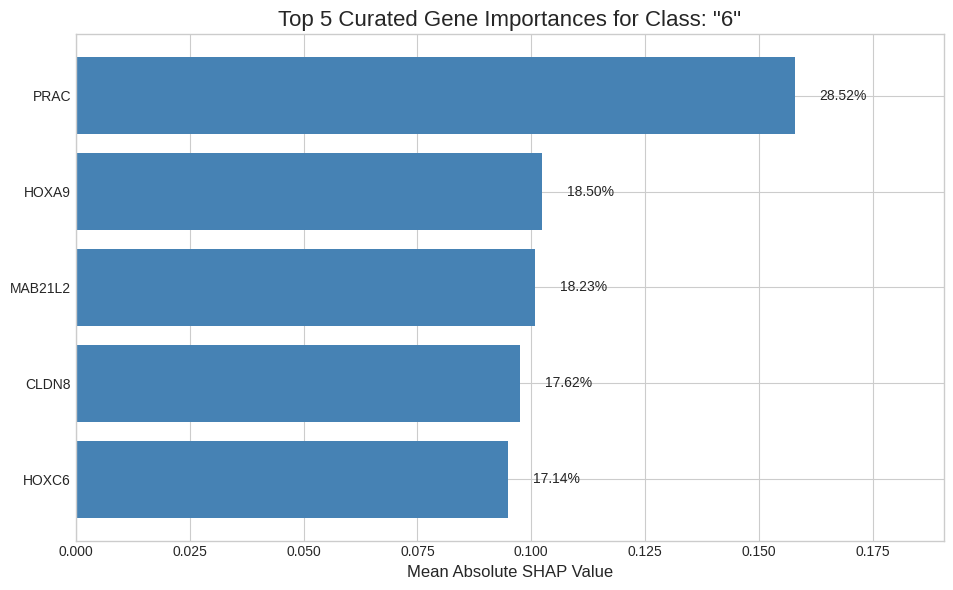

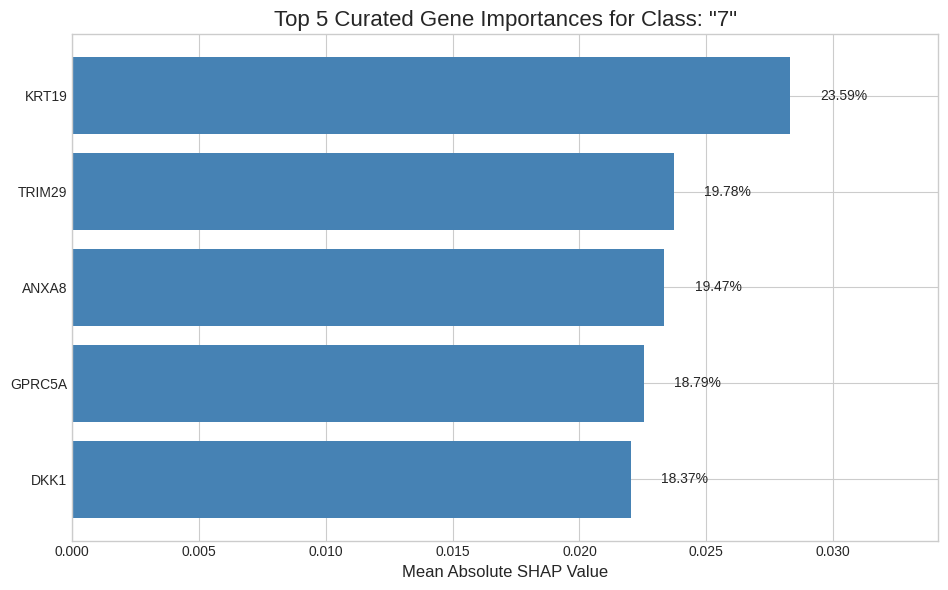

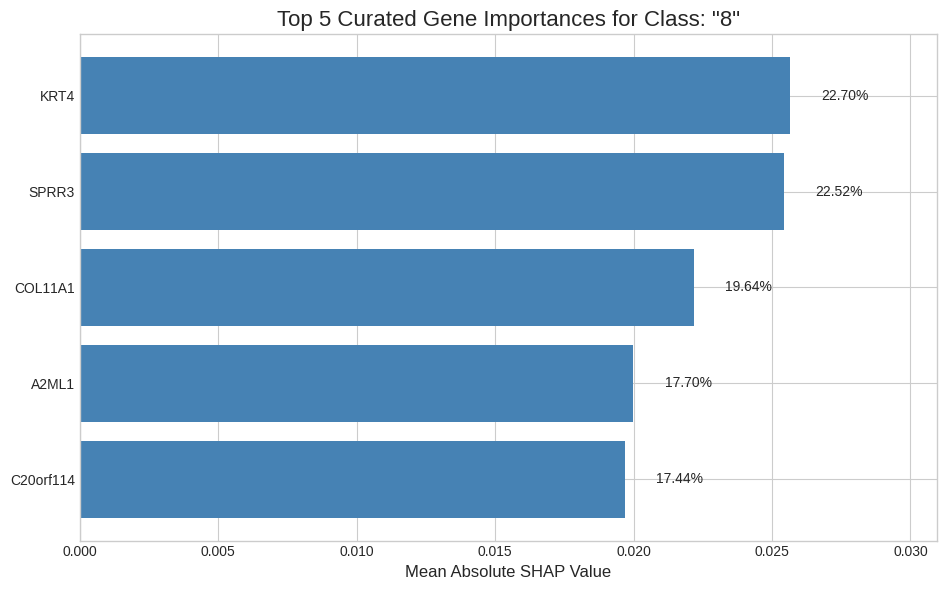

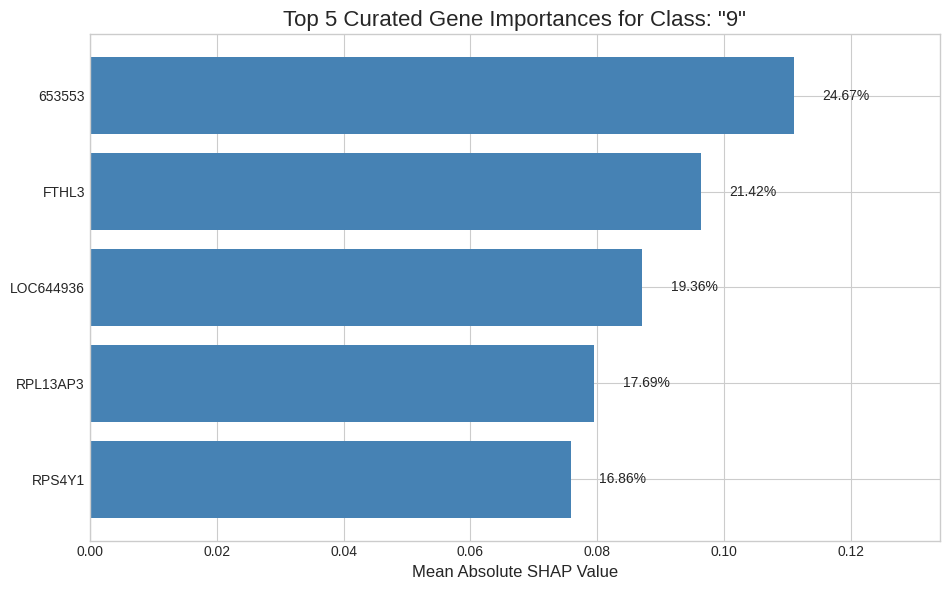

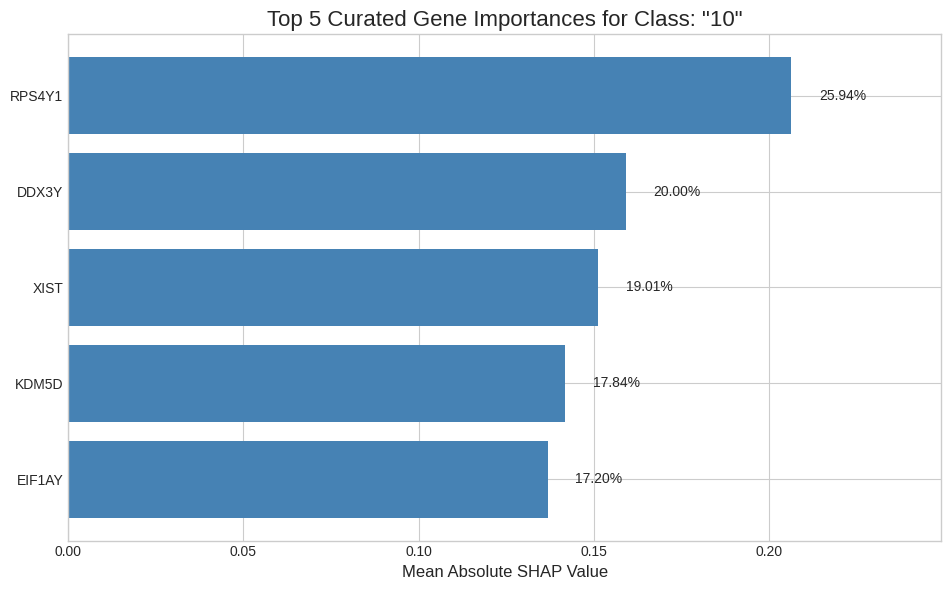

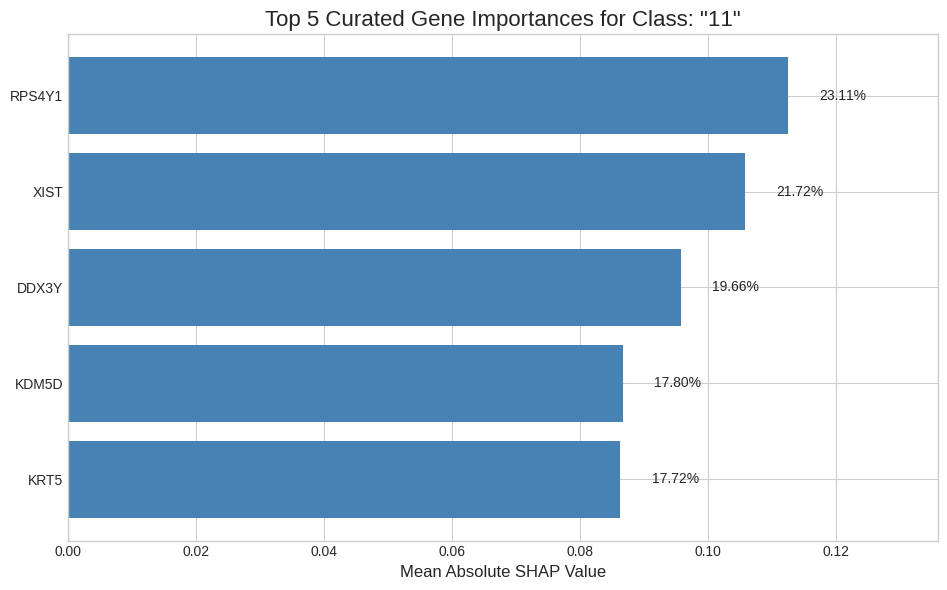

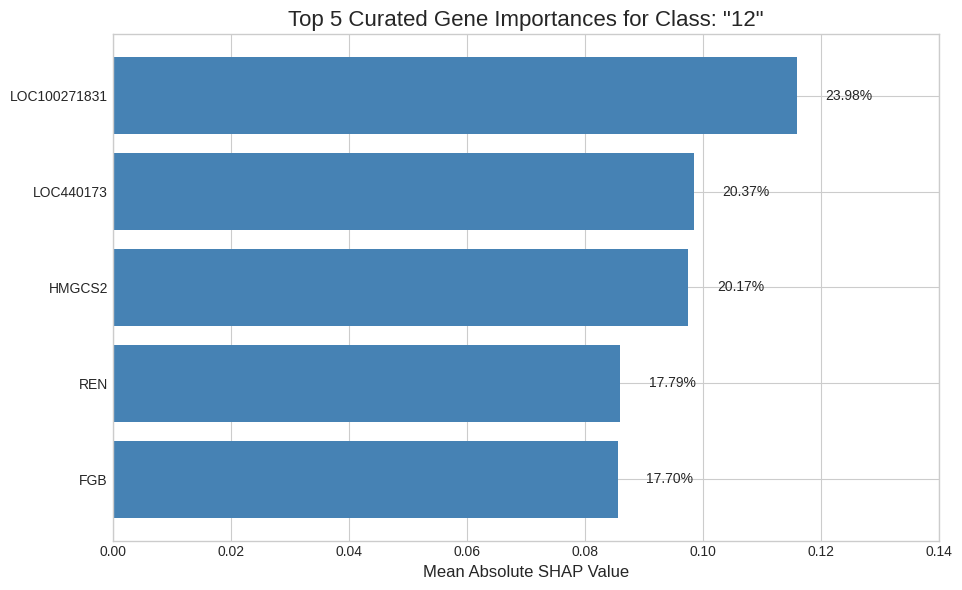

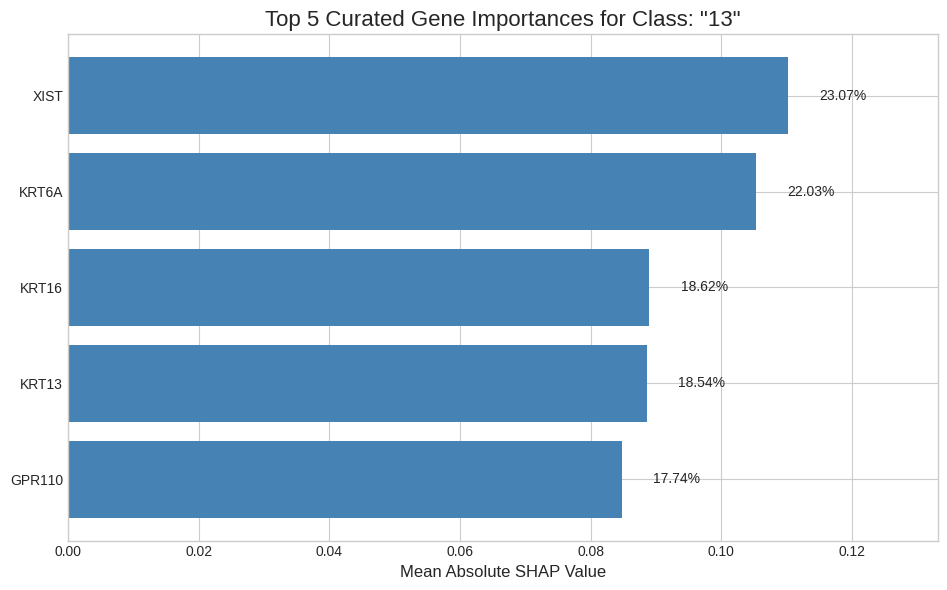

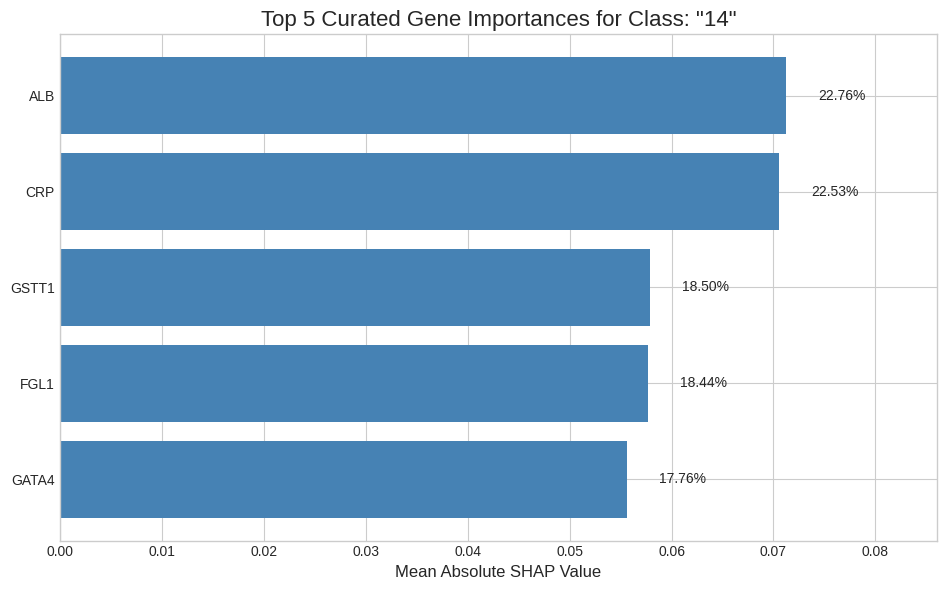

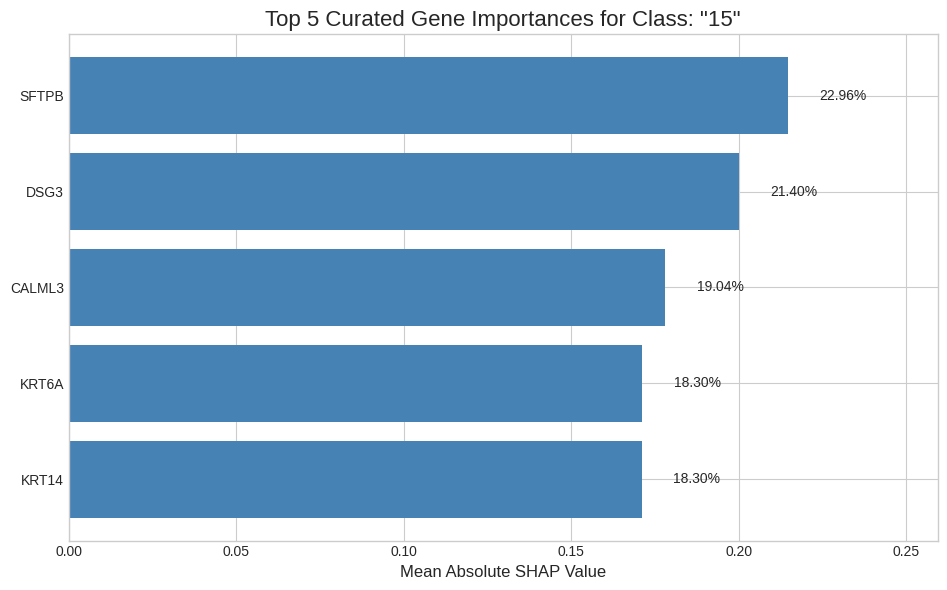

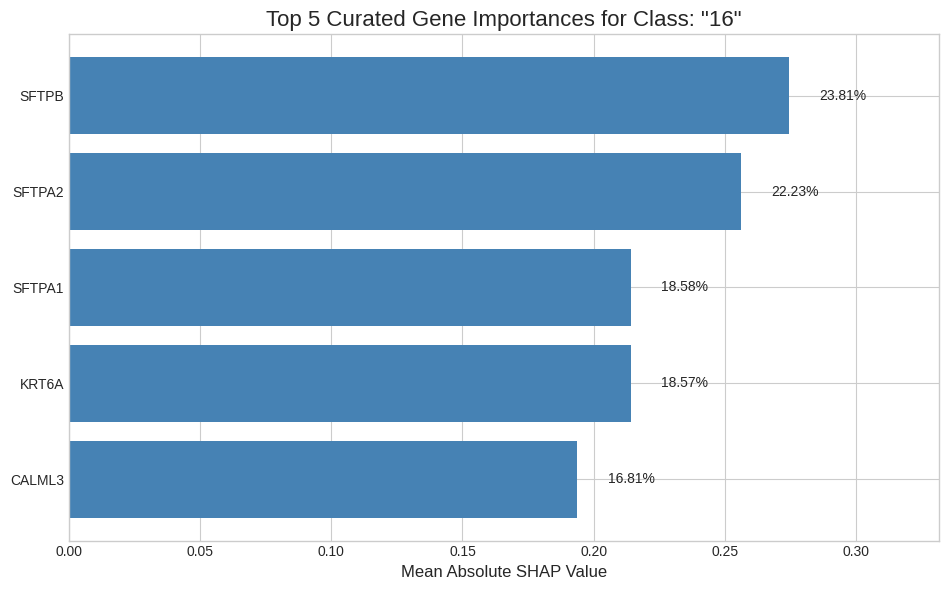

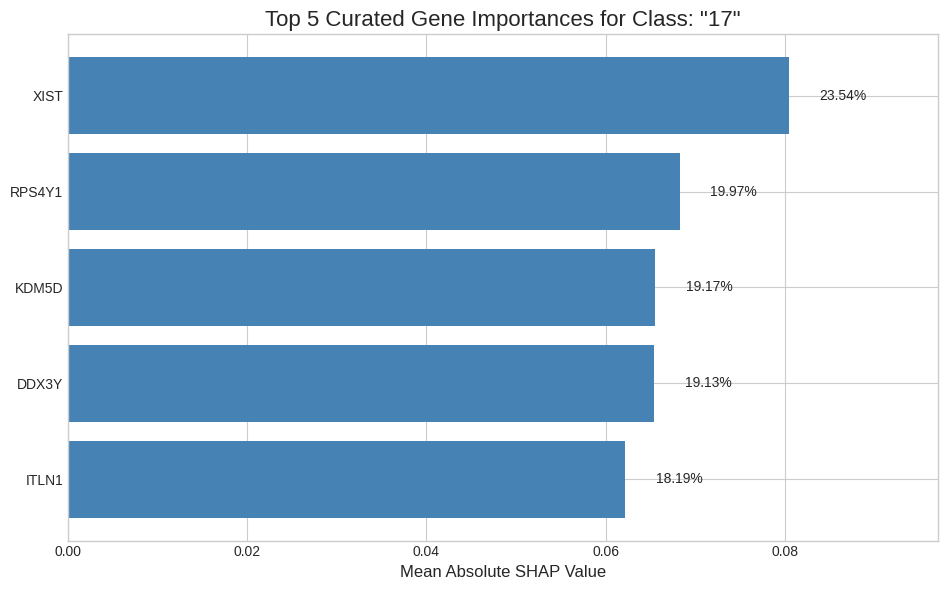

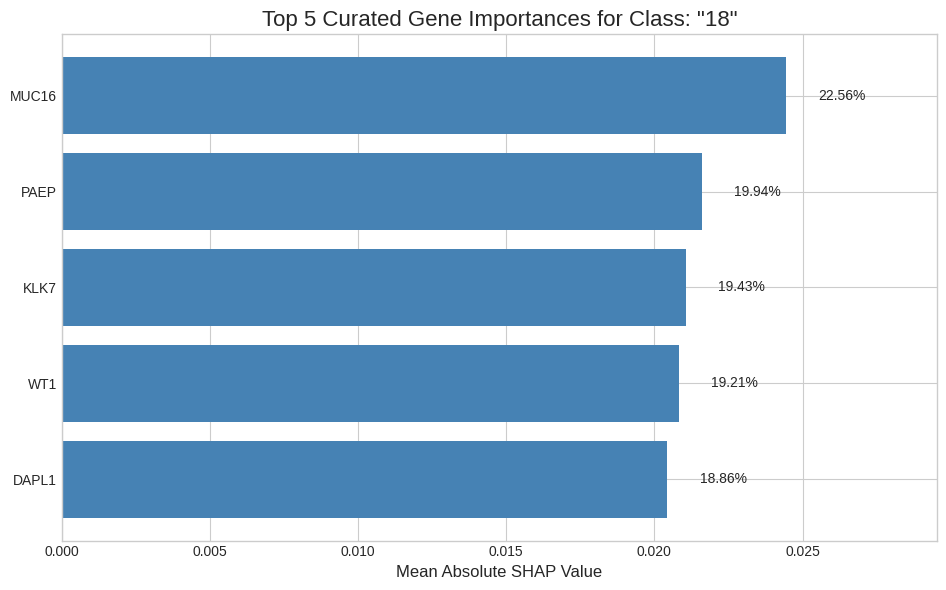

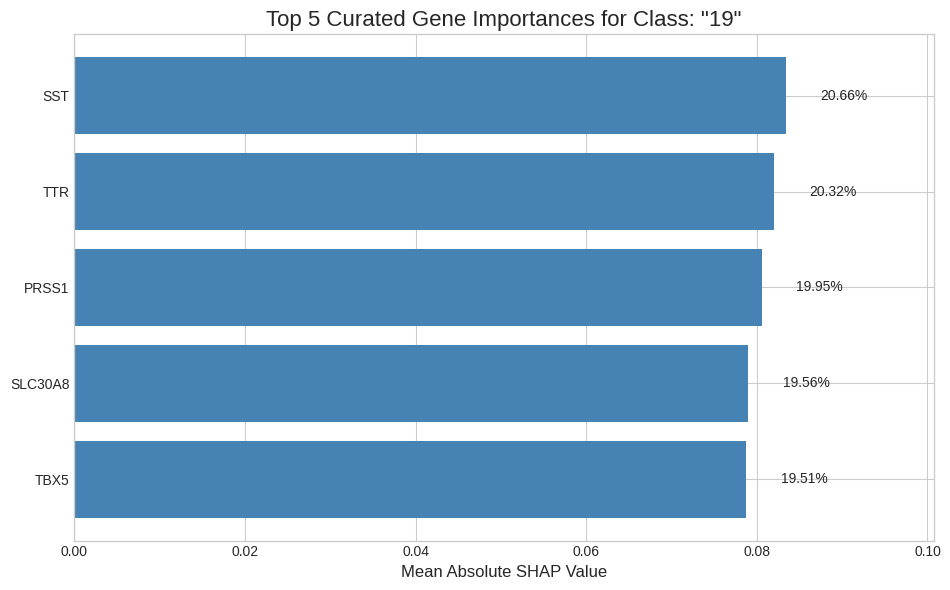

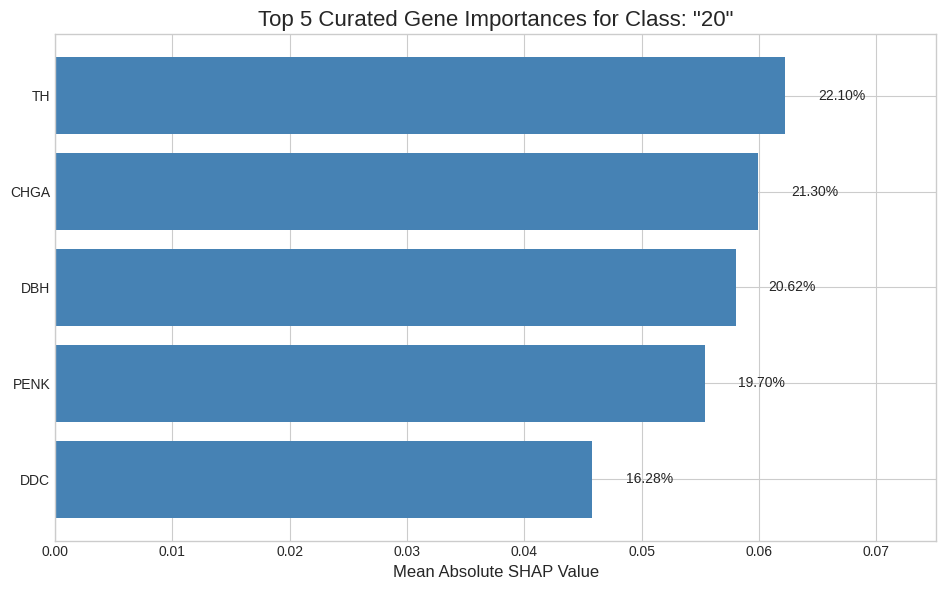

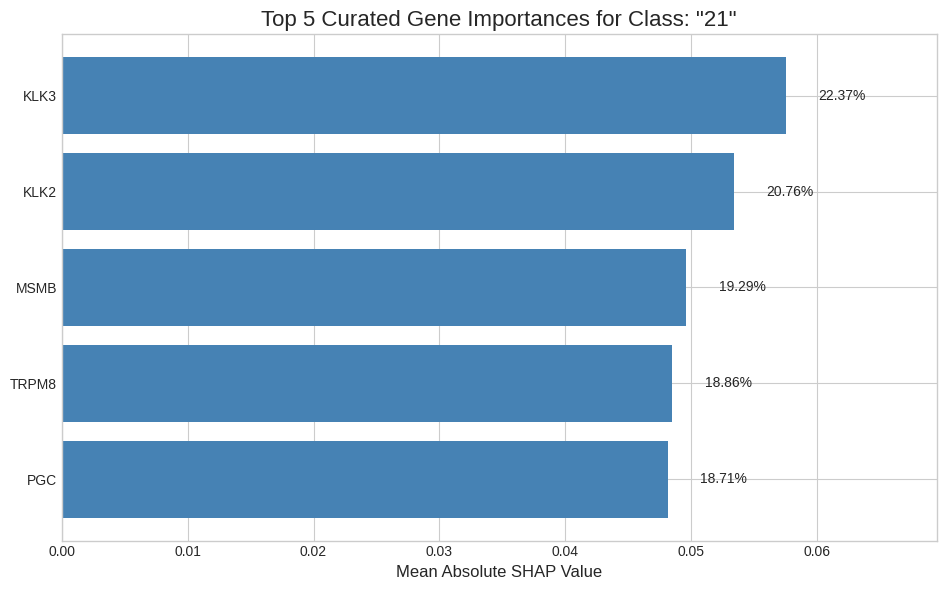

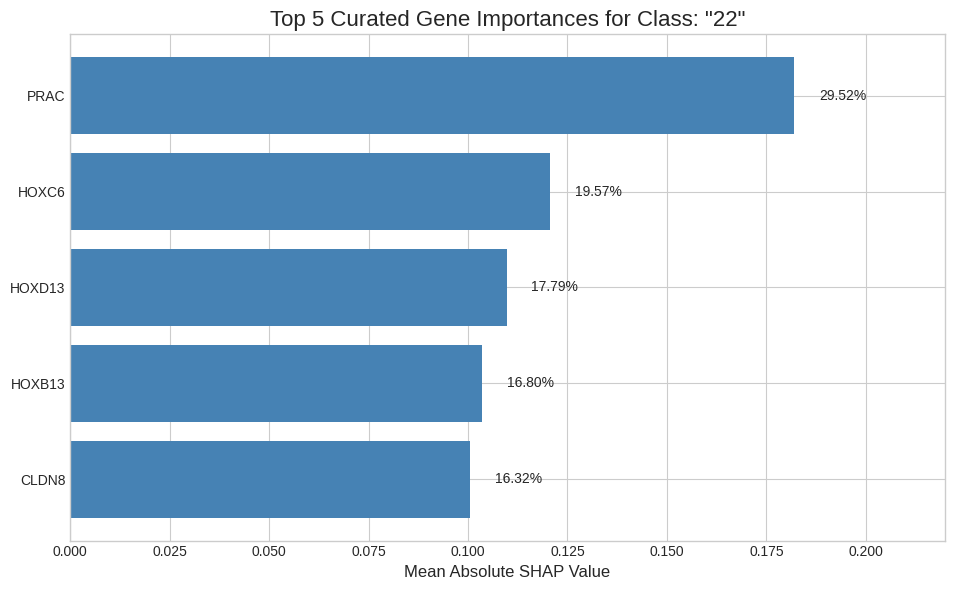

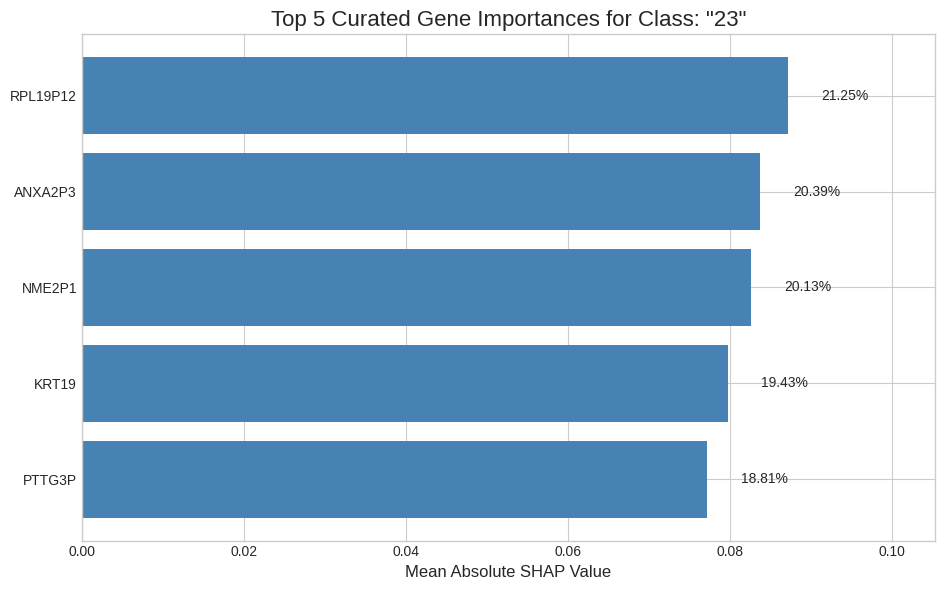

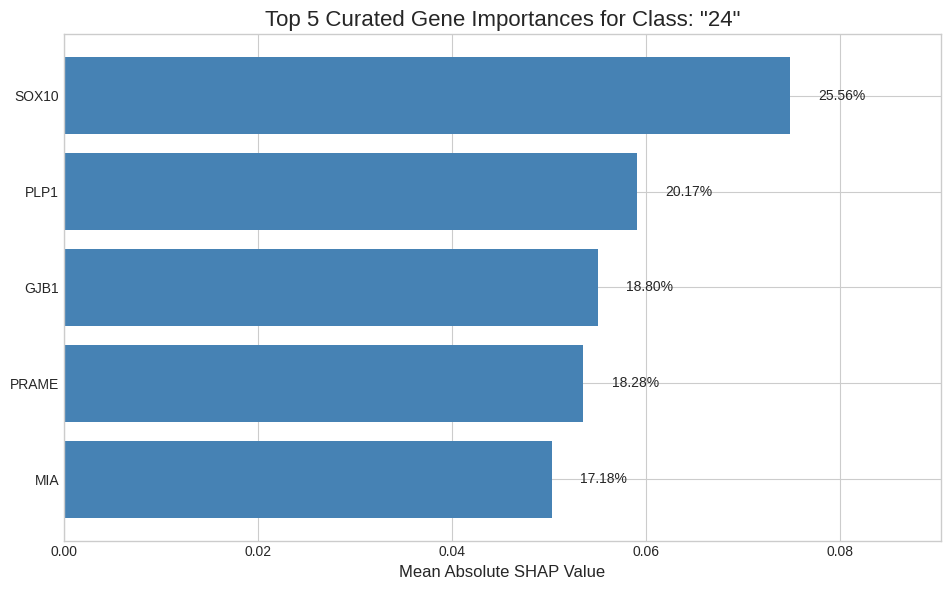

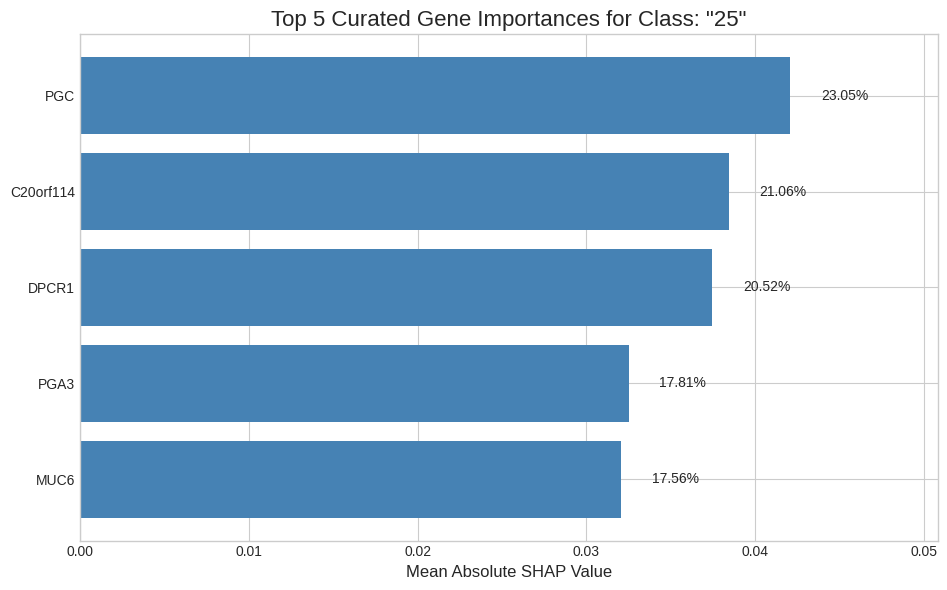

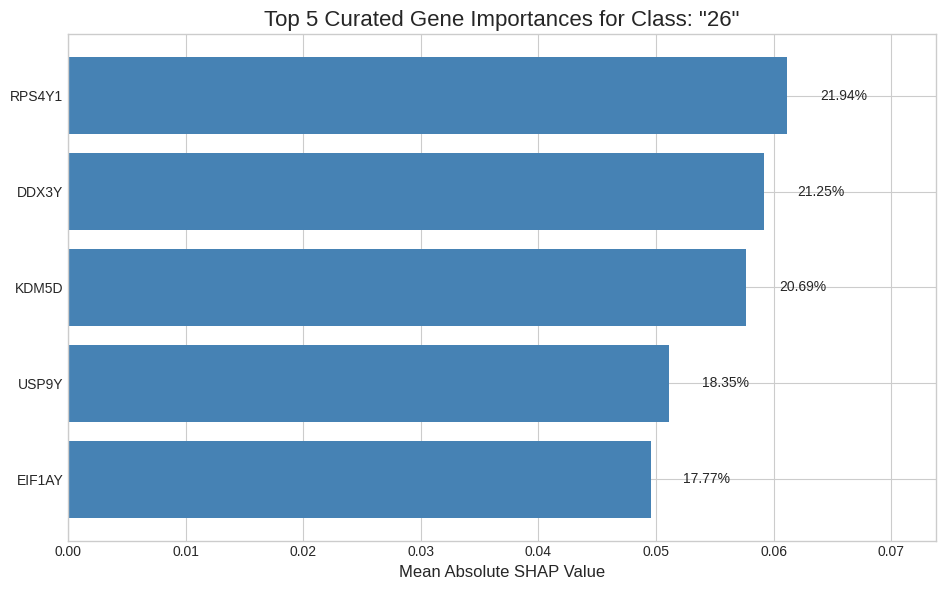

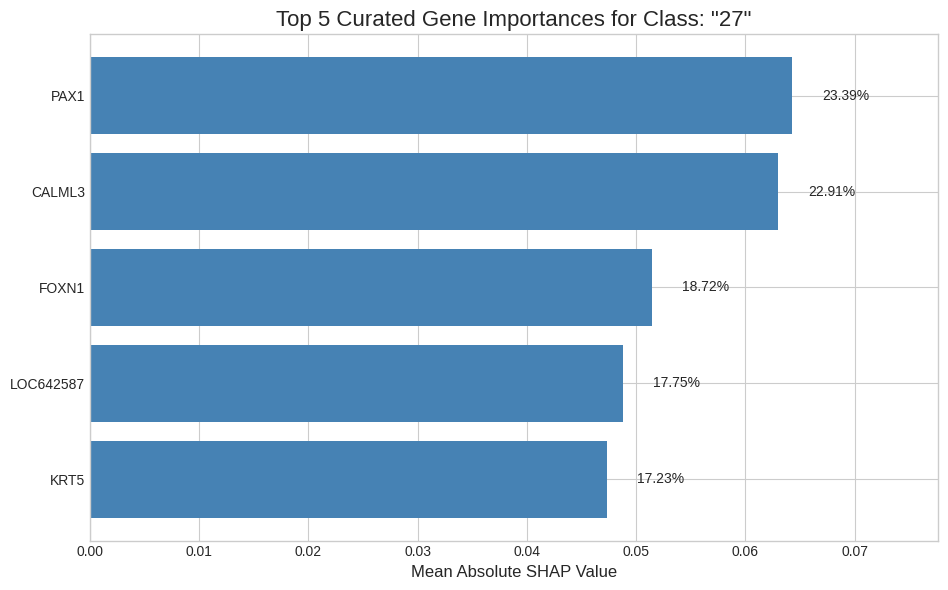

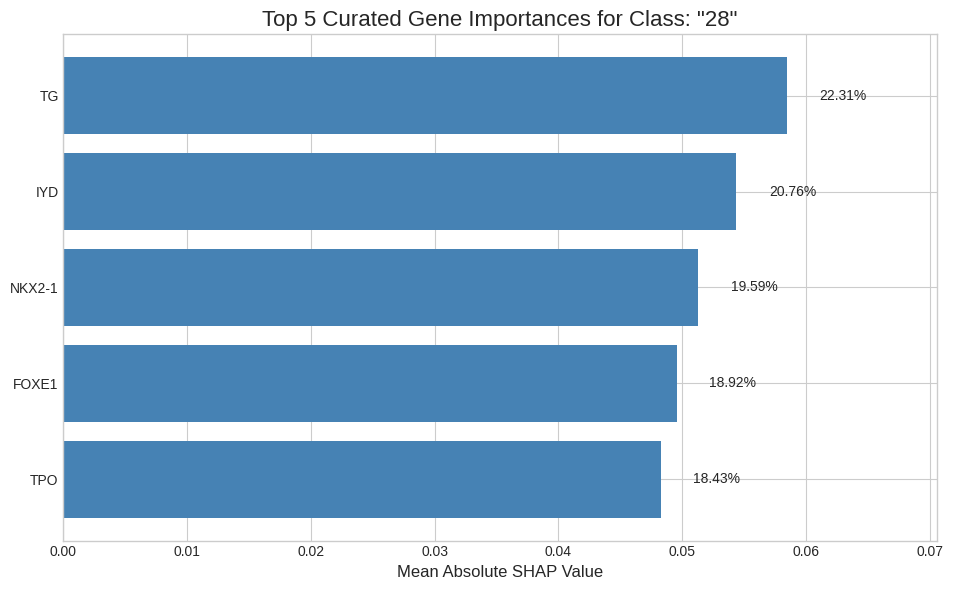

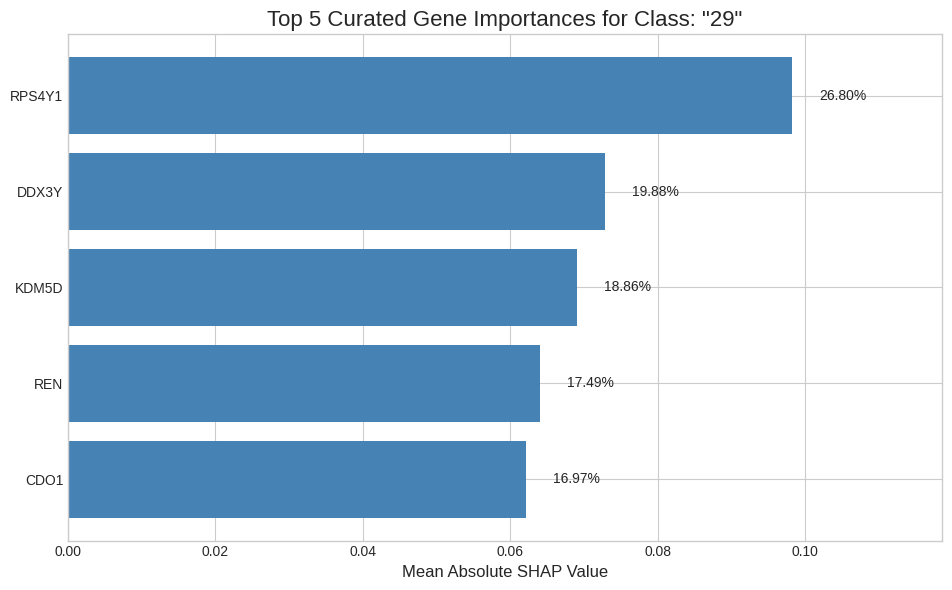

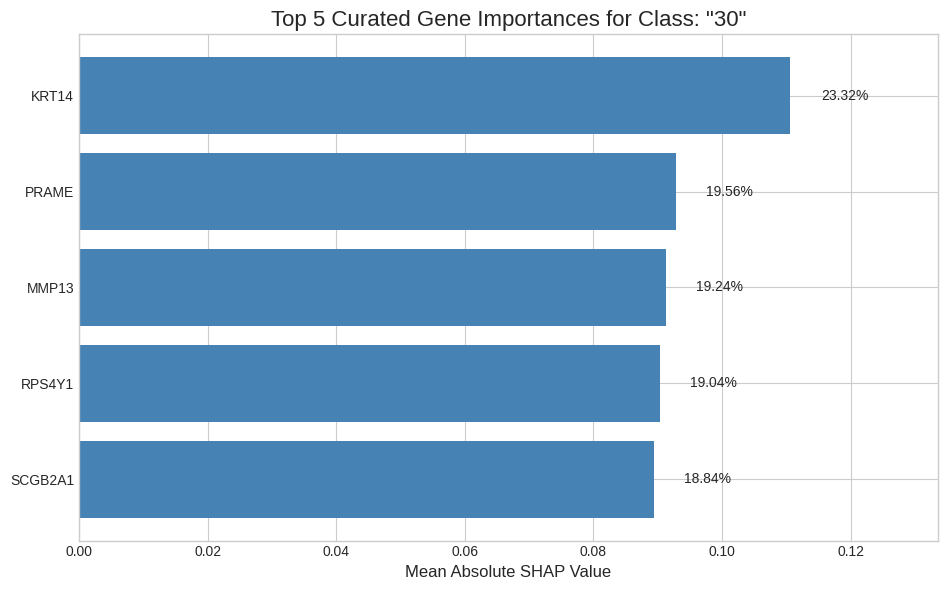

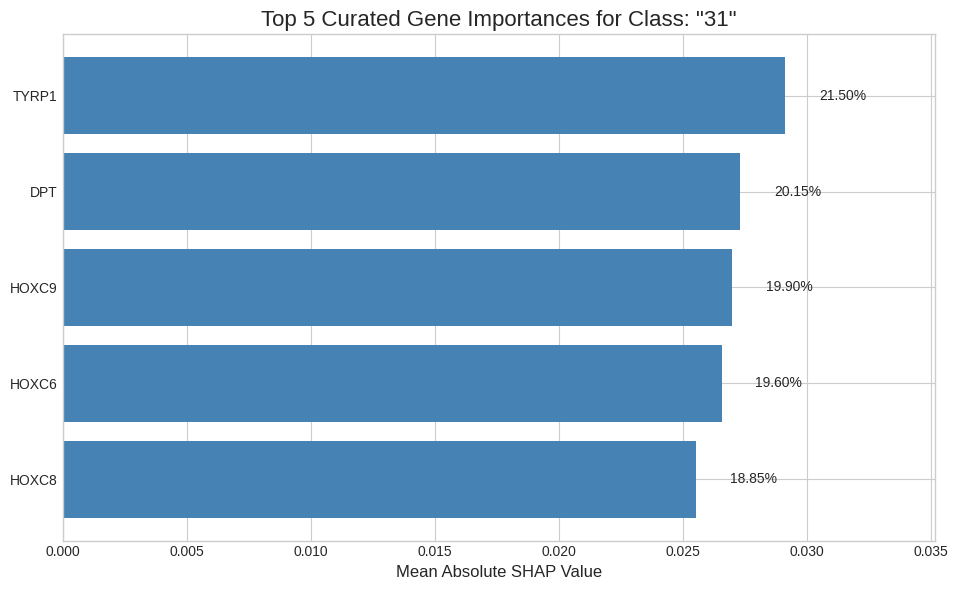

In [15]:

for class_name, genes_to_plot in top_genes_per_class.items():

    # Find the index 'i' corresponding to the current class_name
    # This is needed to slice the correct part of the shap_values array
    i = list(class_names).index(class_name)

    # 1. Get the SHAP values for the current class
    class_shap_values = shap_values[:, :, i]

    # 2. Create the Series of mean absolute SHAP values for ALL features
    # We still need this to look up the values for our selected genes
    feature_importance_series = pd.Series(
        np.abs(class_shap_values).mean(axis=0),
        index=X.columns
    )

    # 3. --- THIS IS THE KEY CHANGE ---
    # Select the importance scores ONLY for your pre-selected genes
    importance_for_selected_genes = feature_importance_series.loc[genes_to_plot]

    # 4. Sort these values for a clean plot (most important at the top)
    sorted_importance = importance_for_selected_genes.sort_values(ascending=False)

    # 5. Calculate percentages based ONLY on the sum of these selected genes
    total_importance_selected = sorted_importance.sum()
    percentages = (sorted_importance / total_importance_selected) * 100

    # 6. Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(sorted_importance.index, sorted_importance.values, color='steelblue')
    ax.invert_yaxis()

    # 7. Annotate each bar with its percentage
    for bar, percentage in zip(bars, percentages):
        ax.text(
            bar.get_width() + (total_importance_selected * 0.01),
            bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%',
            va='center',
            ha='left'
        )

    # --- Formatting ---
    ax.set_title(f'Top {len(genes_to_plot)} Curated Gene Importances for Class: "{class_name}"', fontsize=16)
    ax.set_xlabel('Mean Absolute SHAP Value', fontsize=12)
    plt.tight_layout()
    ax.set_xlim(right=ax.get_xlim()[1] * 1.15) # Make room for annotations

    plt.show()



LR Gene per Cancer type **(tumor gene only )**

In [16]:
import numpy as np
import pandas as pd


# Assume shap_values, X, and class_names are already defined

# Define the set of sex-specific genes to exclude from the analysis
genes_to_exclude = {
    # Y-Chromosome Gene List
    "SRY", "ZFY", "RPS4Y1", "RPS4Y2", "AMELY", "TBL1Y", "PCDH11Y",
    "TGIF2LY", "TSPY1", "TSPY2", "USP9Y", "DDX3Y", "UTY", "TB4Y",
    "CYorf15A", "CYorf15B", "EIF1AY", "KDM5D", "XKRY", "HSFY1", "HSFY2",
    "PRY", "PRY2", "RBMY1A1", "DAZ1", "DAZ2", "DAZ3", "DAZ4", "CDY1",
    "CDY2", "VCY1", "VCY2",
    "CYorf15",
    "XIST", "TSIX",
    "TTTY1",
    "TTTY2",
    "TTTY3",
    "TTTY4",
    "TTTY5",
    "TTTY6",
    "TTTY7",
    "TTTY8",
    "TTTY9",
    "TTTY10",
    "TTTY11",
    "TTTY12",
    "TTTY13",
    "TTTY14",
    "TTTY15",
}

# A dictionary to store the top N genes for each class
top_genes_per_class = {}
N = 5 # Let's find the top 5 genes for each class

# Iterate through the classes (the third dimension of shap_values)
# shap_values shape: (samples, features, classes)
for i in range(shap_values.shape[2]):
    # Calculate the mean absolute SHAP value for each gene across all samples for the current class
    global_importance = np.mean(np.abs(shap_values[:, :, i]), axis=0)

    # Create a DataFrame for easy sorting
    importance_df = pd.DataFrame({
        'Gene': X.columns,
        'SHAP_Importance': global_importance
    })

    filtered_importance_df = importance_df[~importance_df['Gene'].isin(genes_to_exclude)]
    # ----------------------------------------------------

    # Sort by importance and get the top N genes from the *filtered* list
    top_genes = filtered_importance_df.sort_values(by='SHAP_Importance', ascending=False).head(N)

    # Store the results using the actual class name
    class_name = class_names[i]
    top_genes_per_class[class_name] = top_genes['Gene'].tolist()

# Print the top genes for all classes
print("Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):")
for class_name, genes in top_genes_per_class.items():
    print(f" {class_name}: {genes}")

Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):
 0: ['KRT19', 'DLK1', 'DES', 'IGF2', 'CHRDL1']
 1: ['MUC5B', 'IRX2', 'UPK1B', 'TCF21', 'PITX2']
 2: ['653553', 'FTHL3', 'LOC644936', 'GCSH', 'RPL13AP3']
 3: ['NLGN4Y', 'IRX1', 'TCF21', 'SCGB2A2', 'AZGP1']
 4: ['PRKY', 'NLGN4Y', 'EMX2', 'EMX2OS', 'TMSB4Y']
 5: ['GSTT1', 'RPS27', 'GSTM1', 'XPNPEP2', 'SFRP5']
 6: ['PRAC', 'HOXA9', 'MAB21L2', 'CLDN8', 'HOXC6']
 7: ['KRT19', 'TRIM29', 'ANXA8', 'GPRC5A', 'DKK1']
 8: ['KRT4', 'SPRR3', 'COL11A1', 'A2ML1', 'C20orf114']
 9: ['653553', 'FTHL3', 'LOC644936', 'RPL13AP3', 'NACAP1']
 10: ['RPL19P12', 'ANXA2P3', 'TCF21', 'BARX1', 'ATP5EP2']
 11: ['KRT5', 'LOC100271831', 'KRT6A', 'MUC5B', 'SCARNA7']
 12: ['LOC100271831', 'LOC440173', 'HMGCS2', 'REN', 'FGB']
 13: ['KRT6A', 'KRT16', 'KRT13', 'GPR110', 'KRT14']
 14: ['ALB', 'CRP', 'GSTT1', 'FGL1', 'GATA4']
 15: ['SFTPB', 'DSG3', 'CALML3', 'KRT6A', 'KRT14']
 16: ['SFTPB', 'SFTPA2', 'SFTPA1', 'KRT6A', 'CALML3']
 17: ['ITLN1', 'MSLN', 'ANXA8'

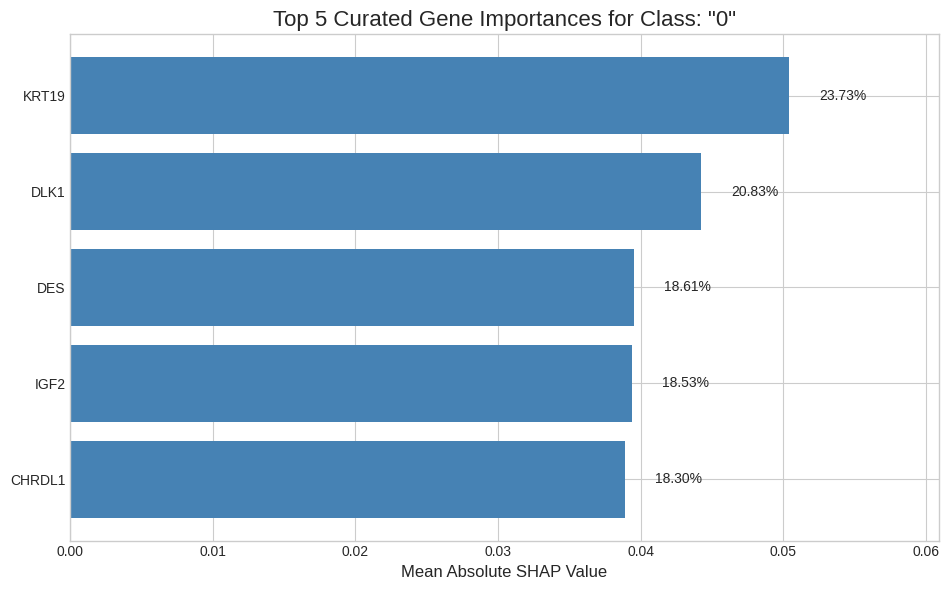

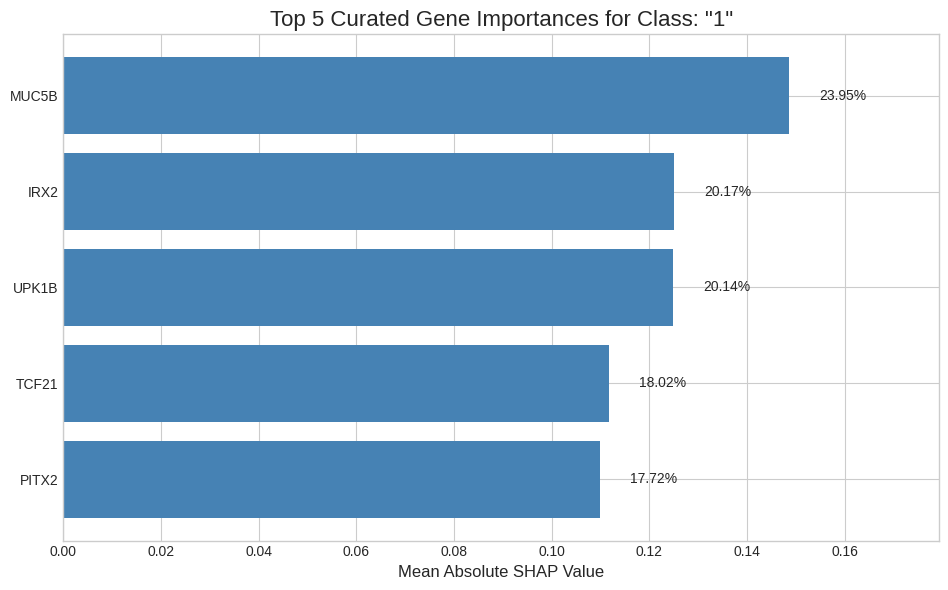

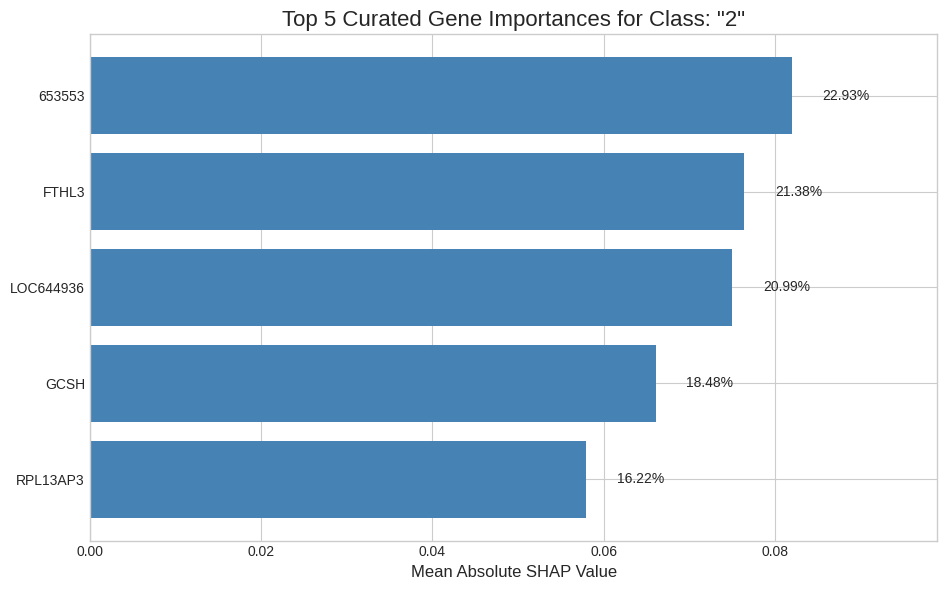

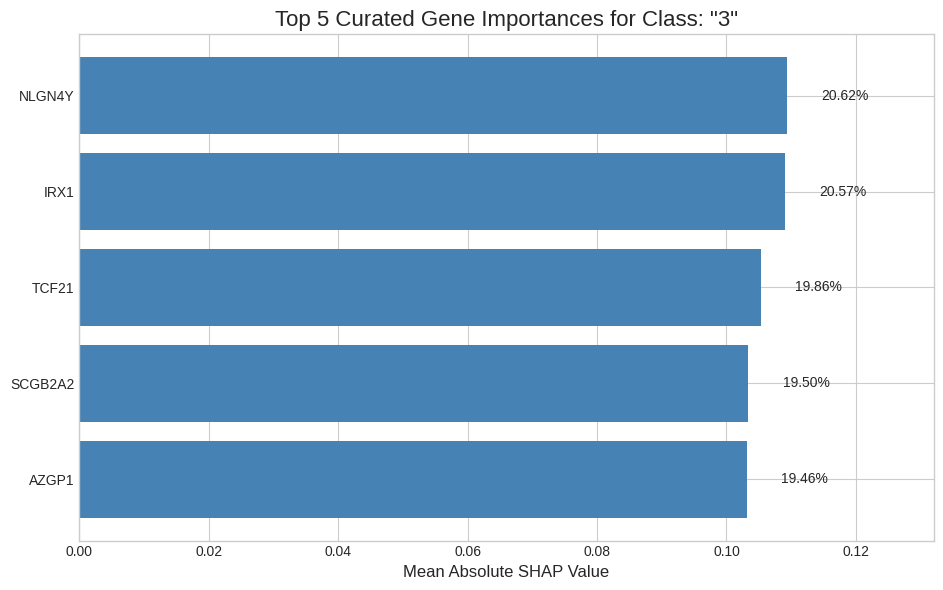

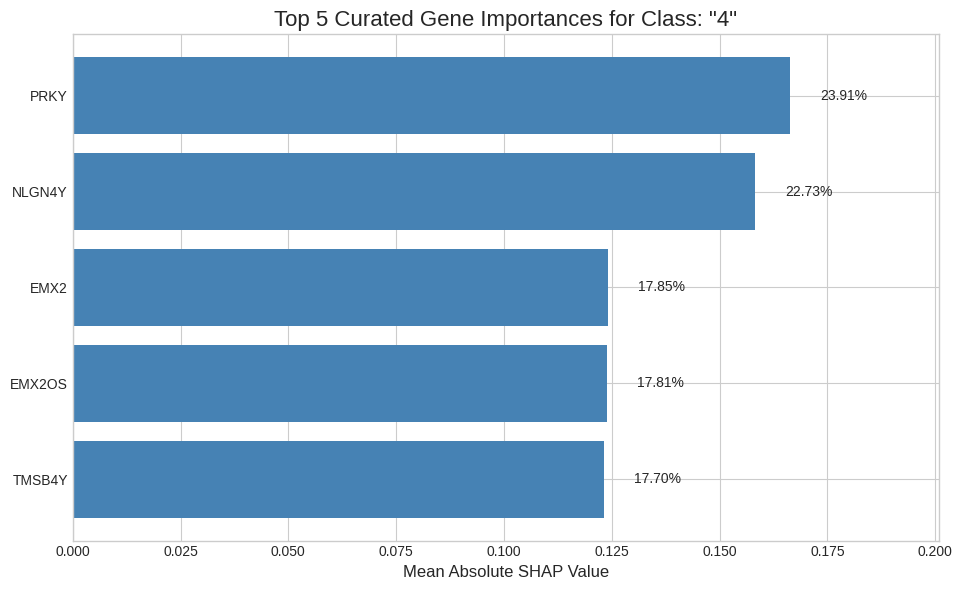

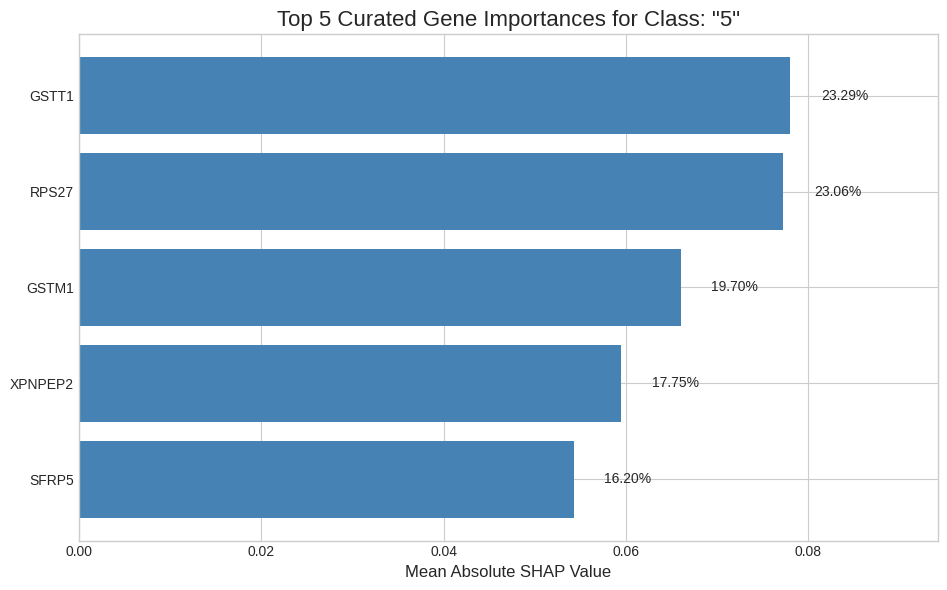

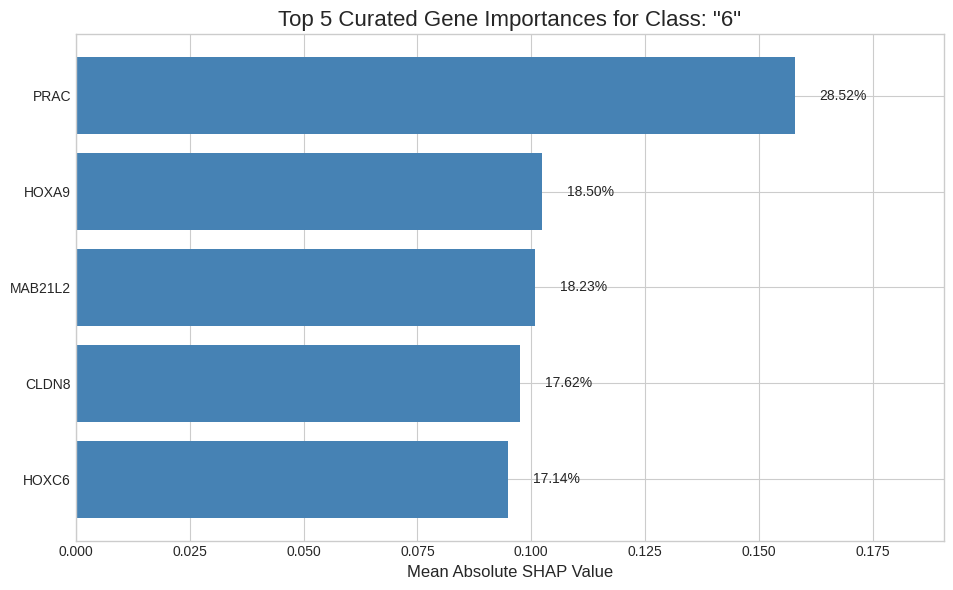

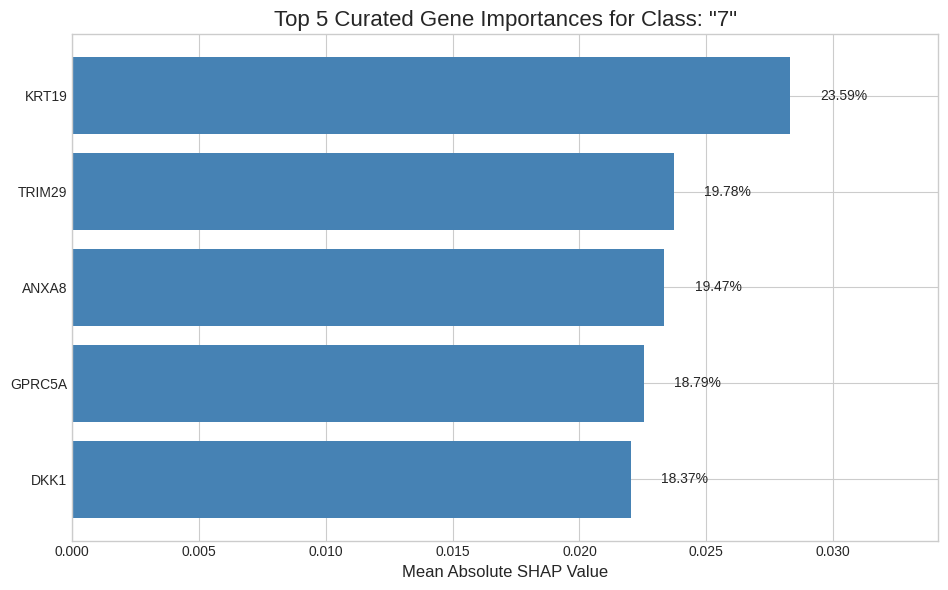

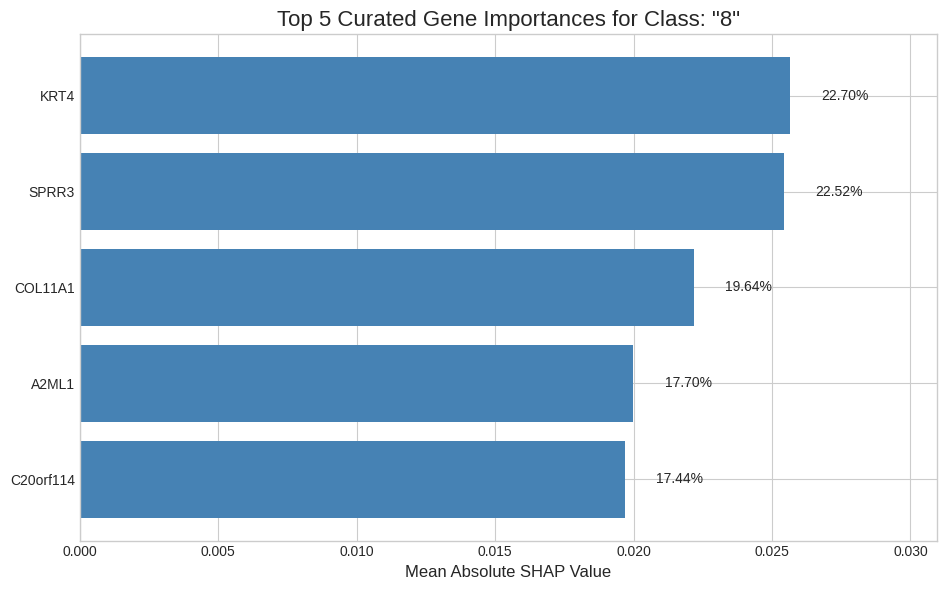

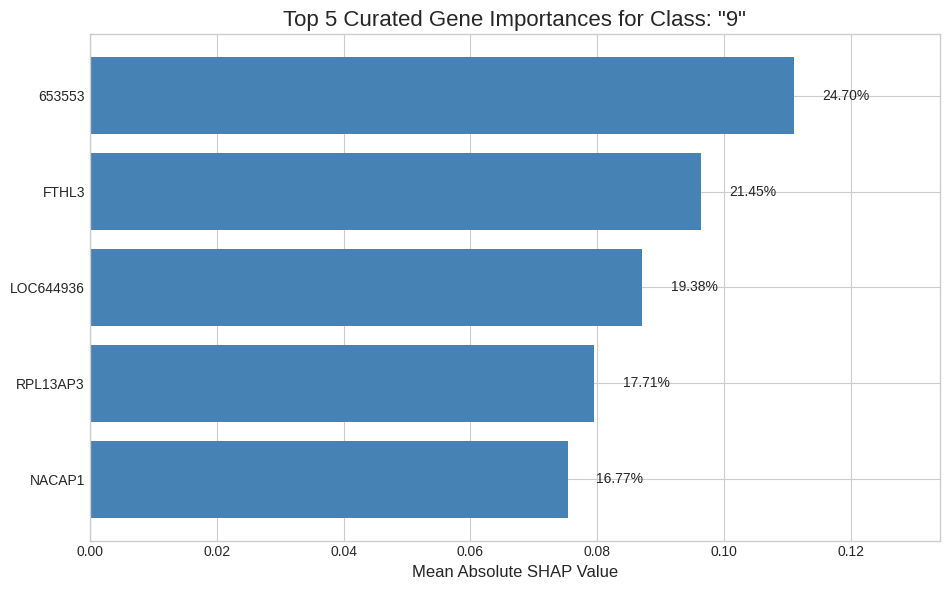

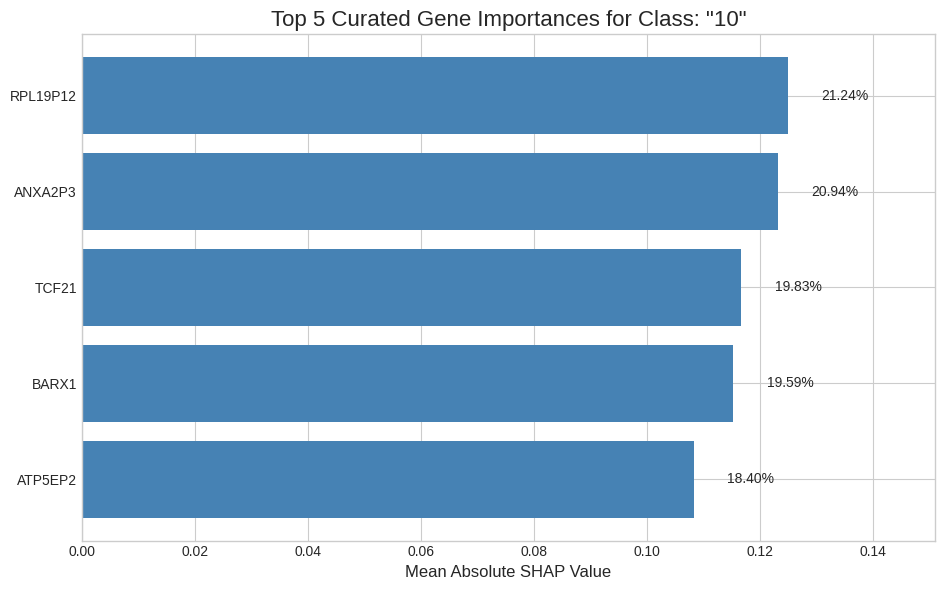

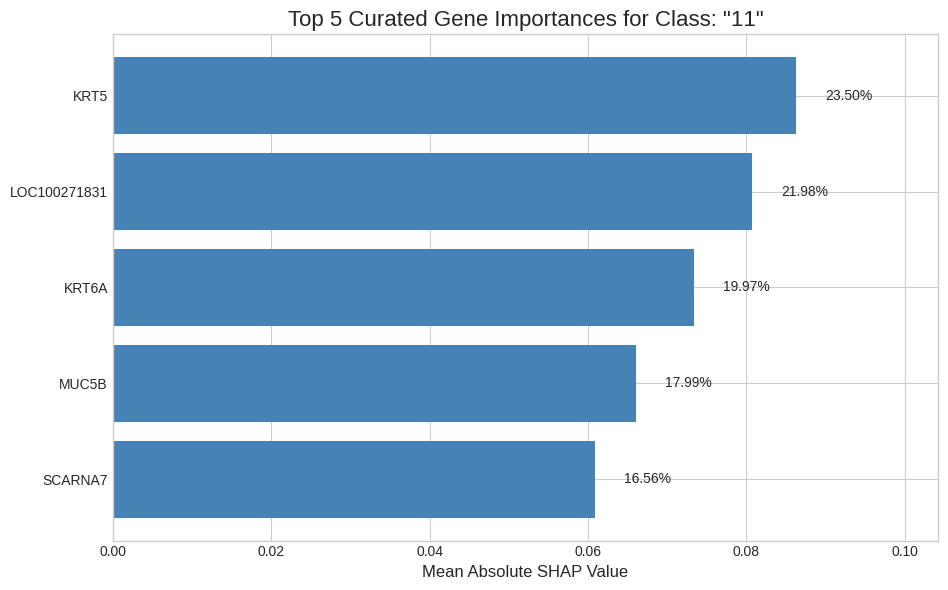

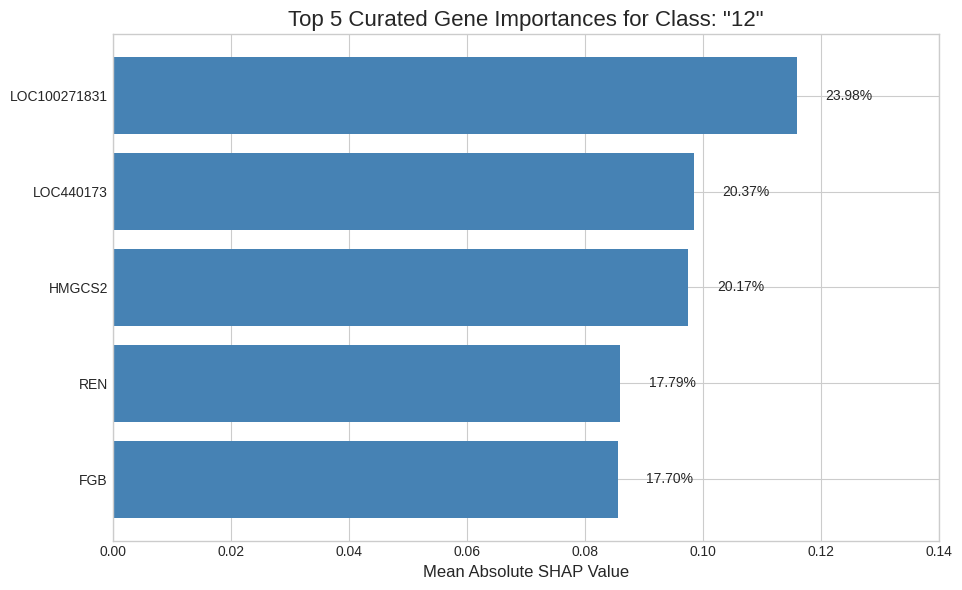

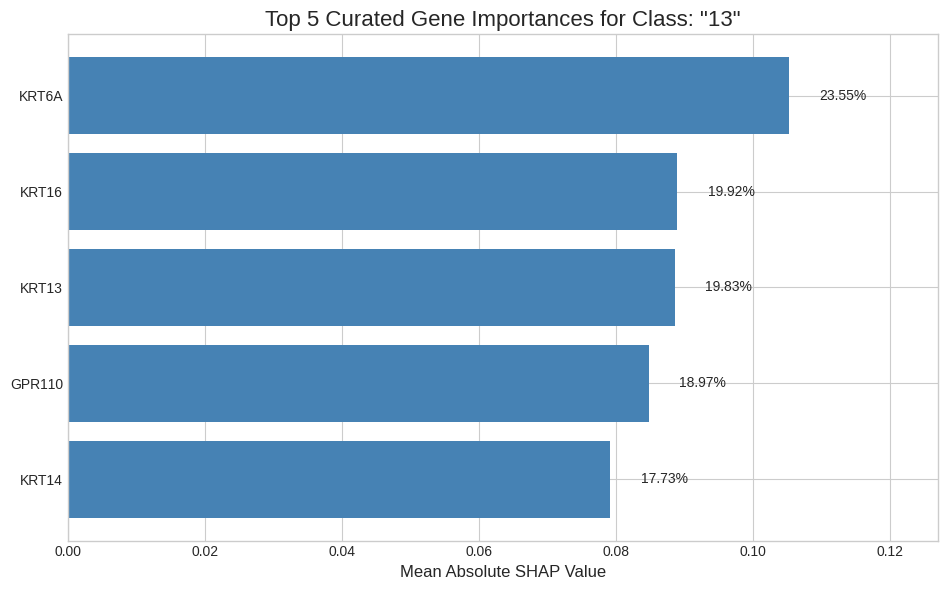

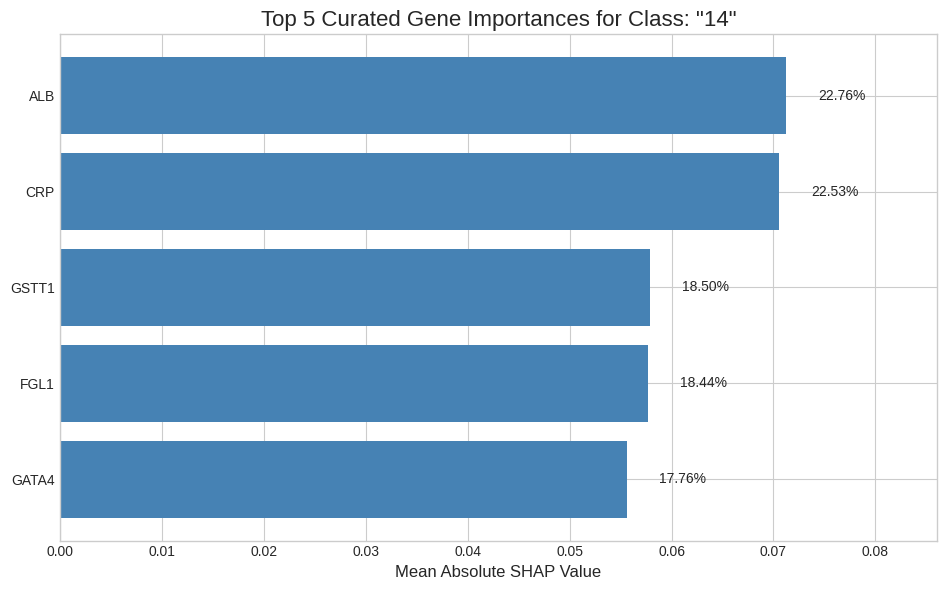

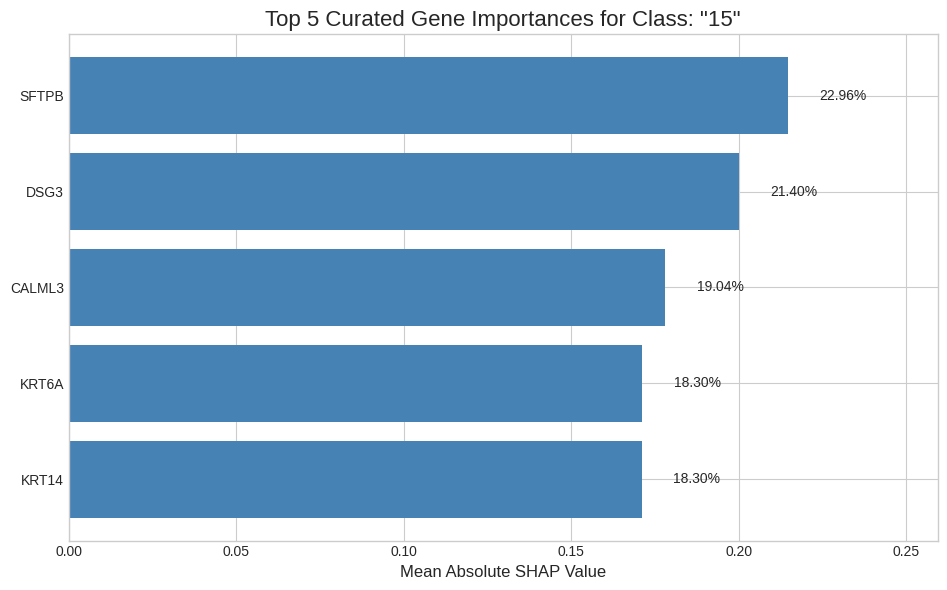

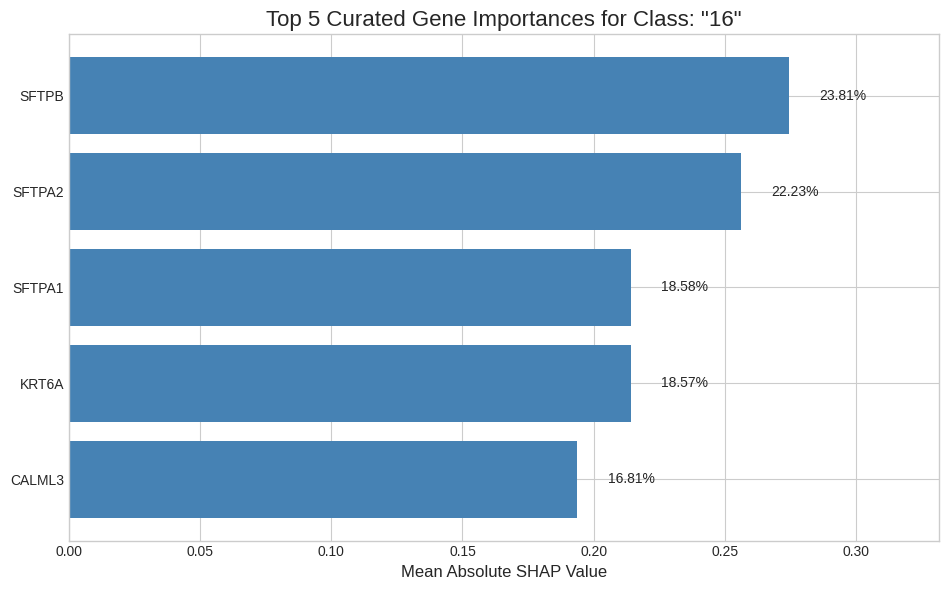

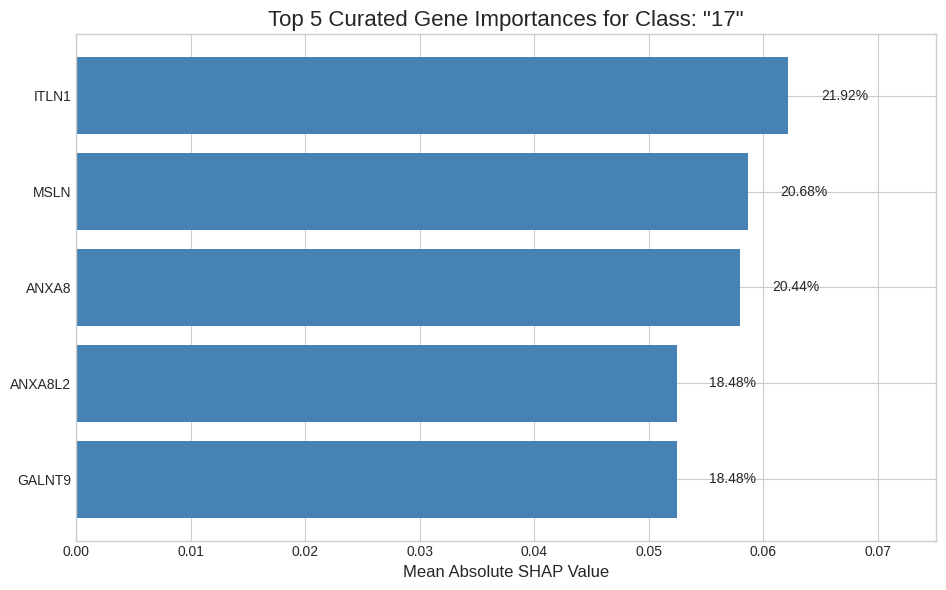

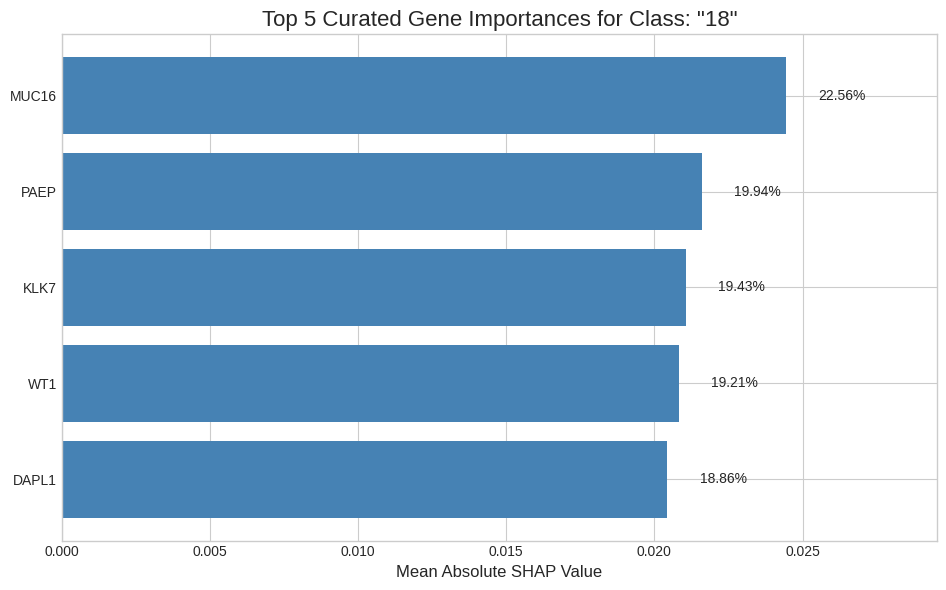

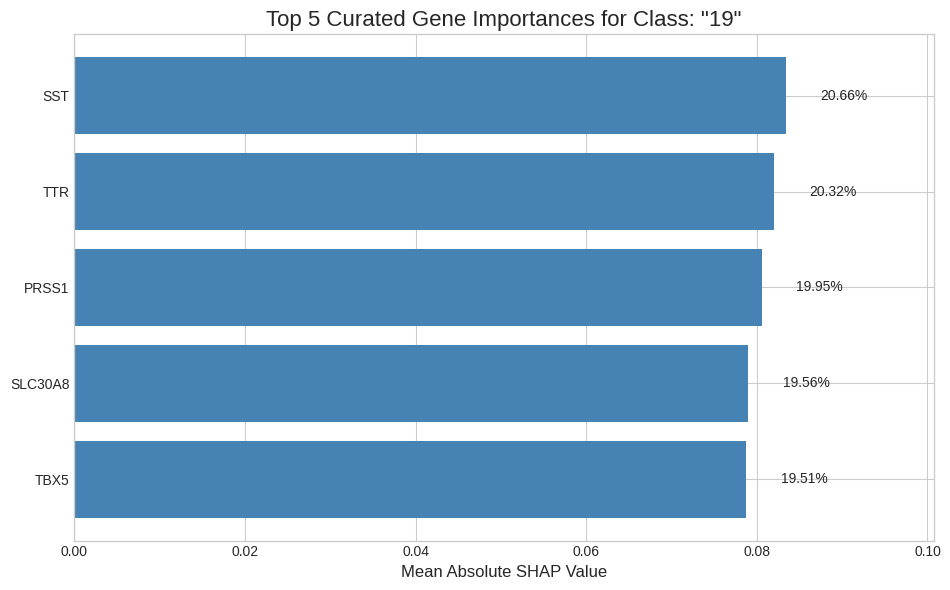

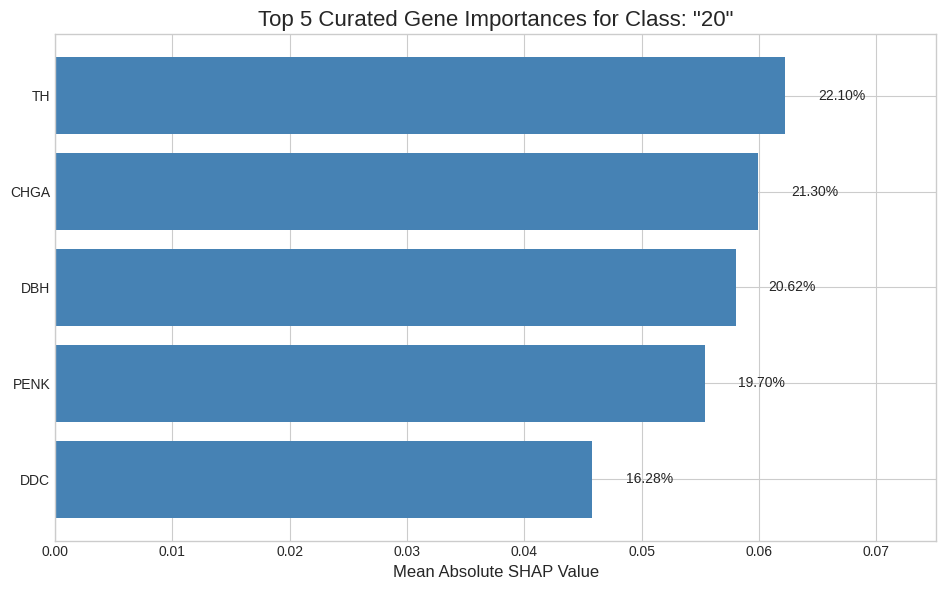

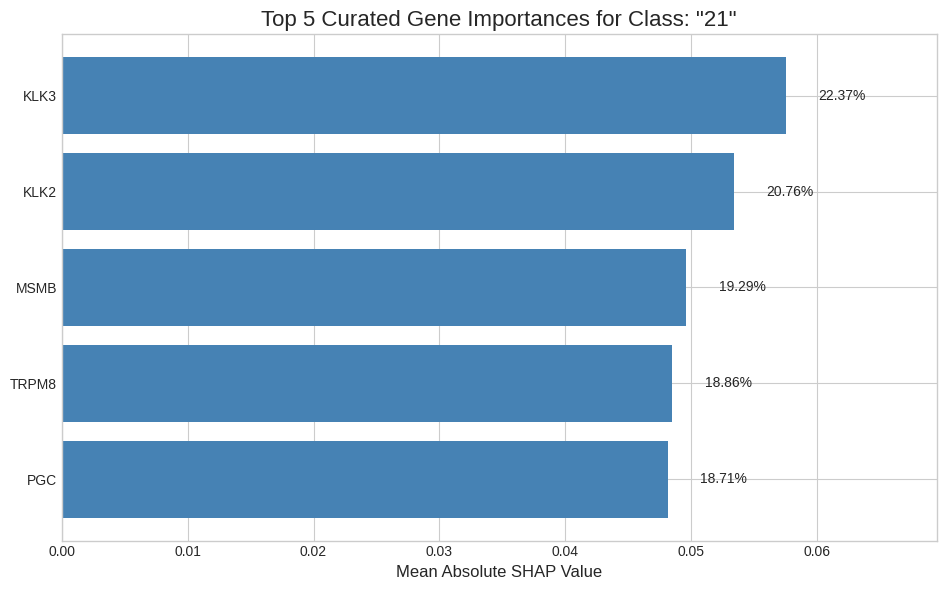

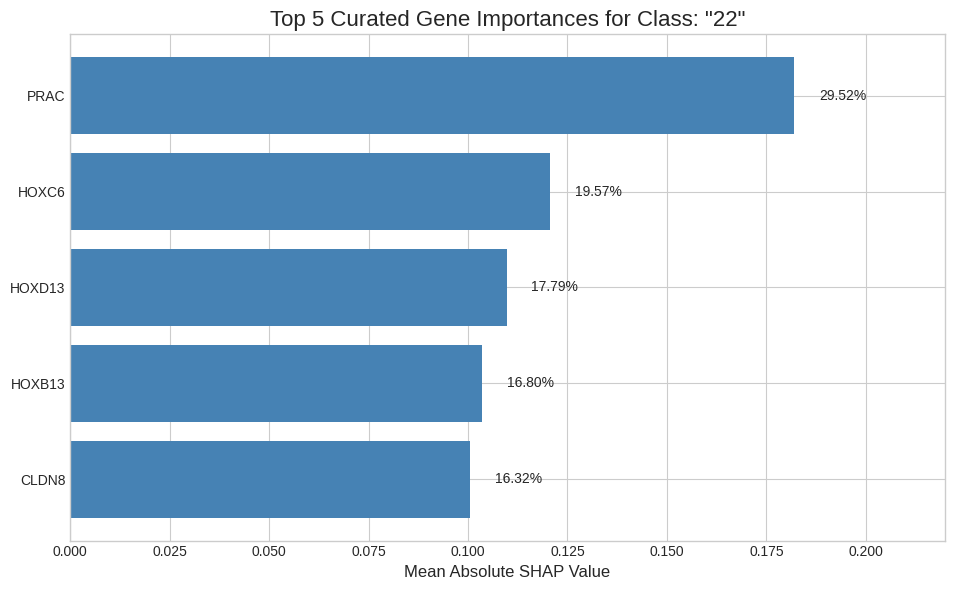

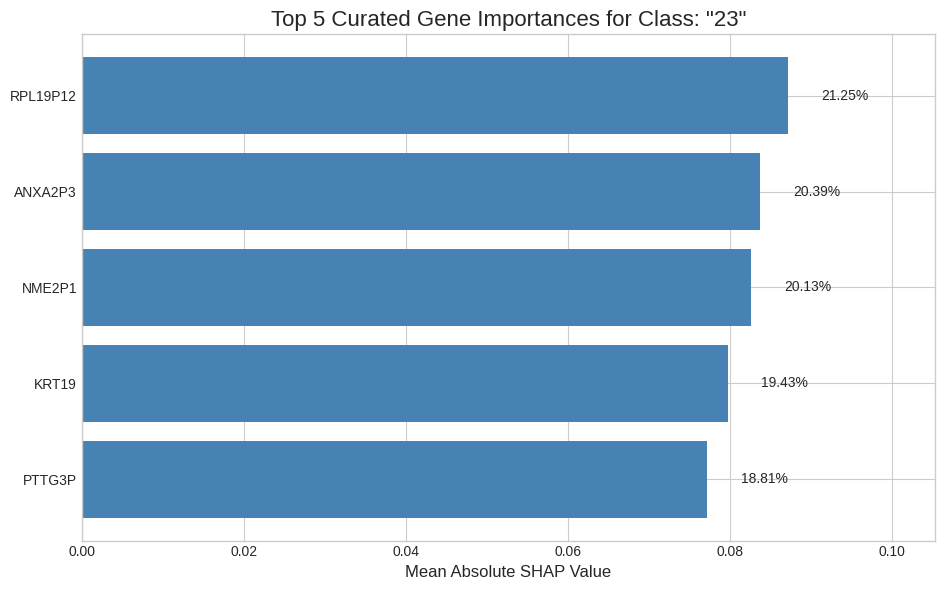

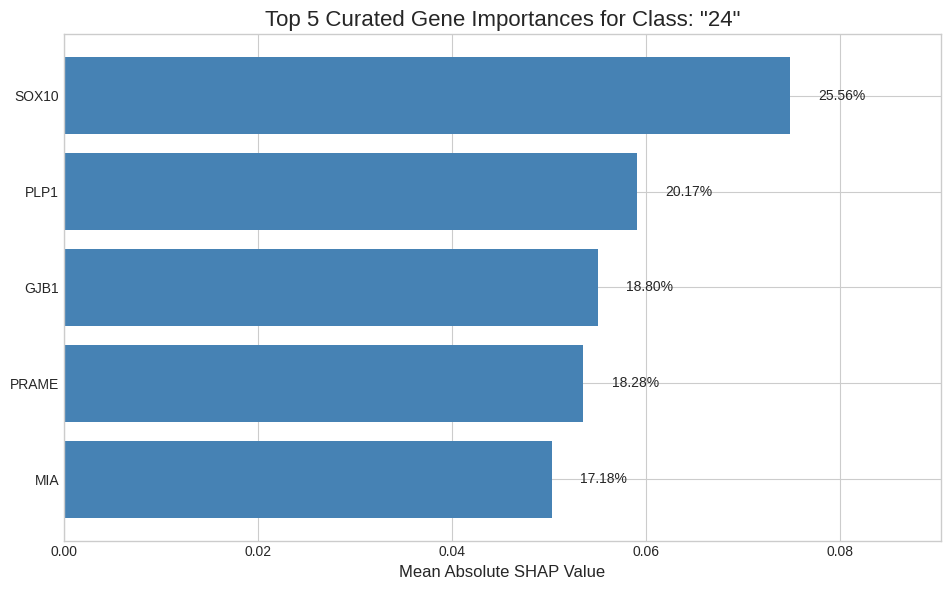

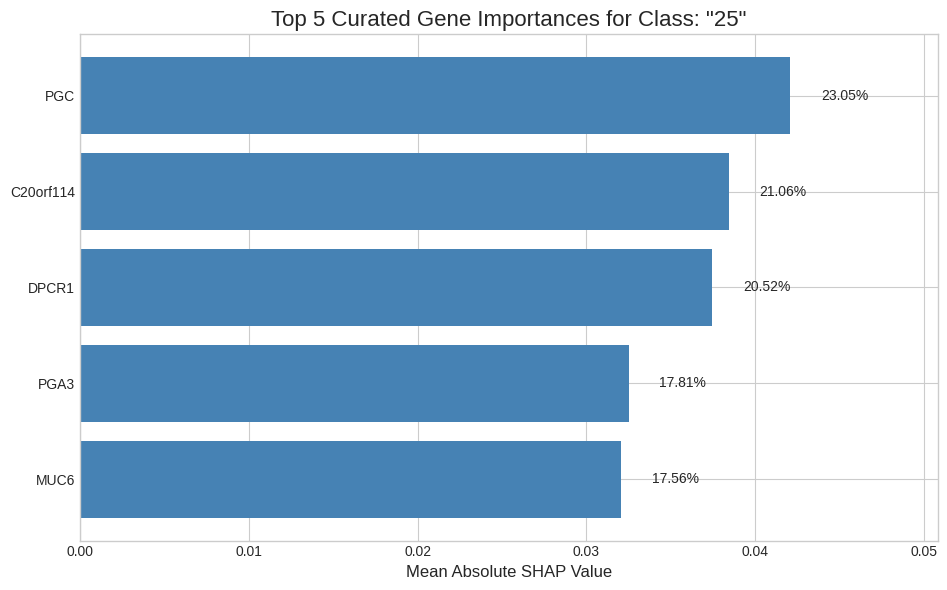

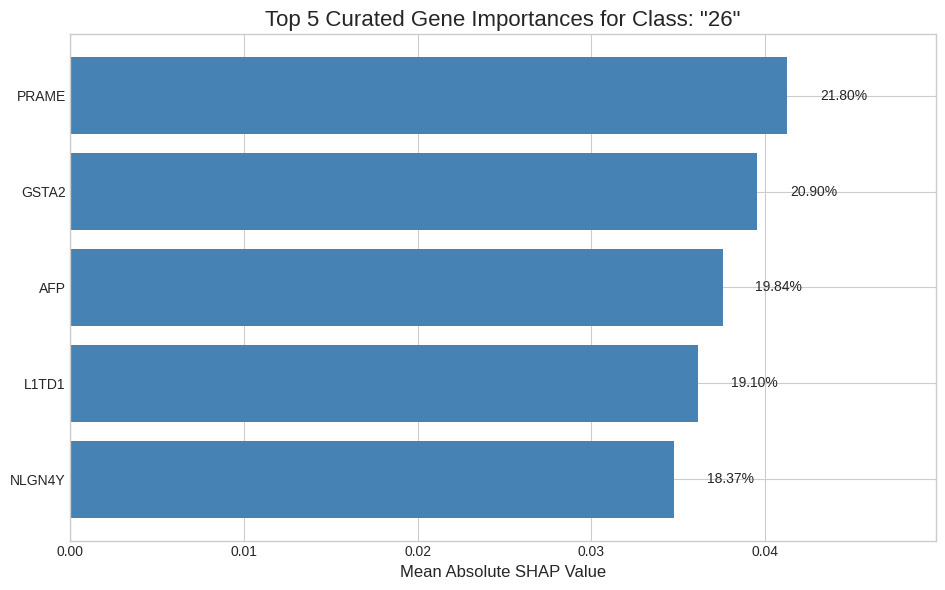

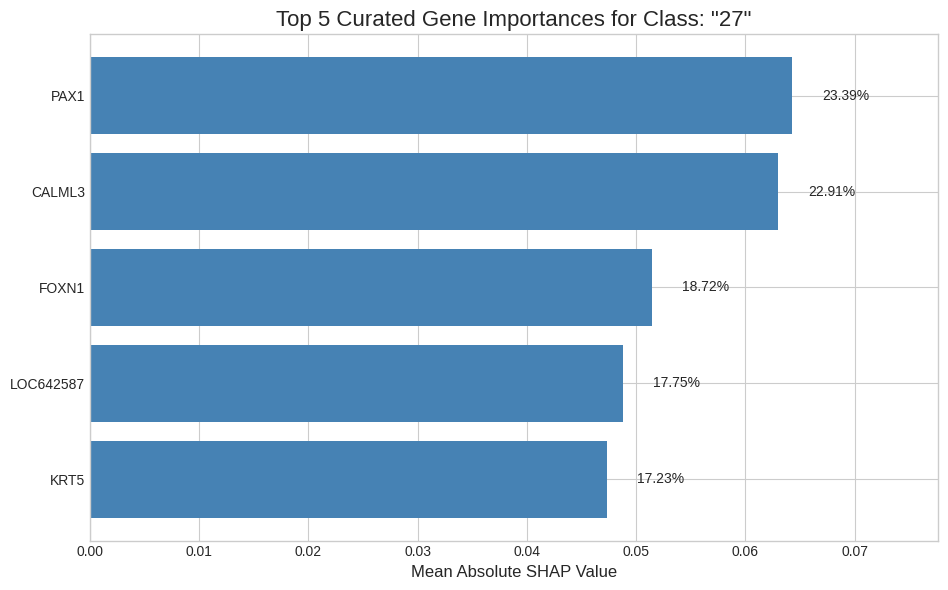

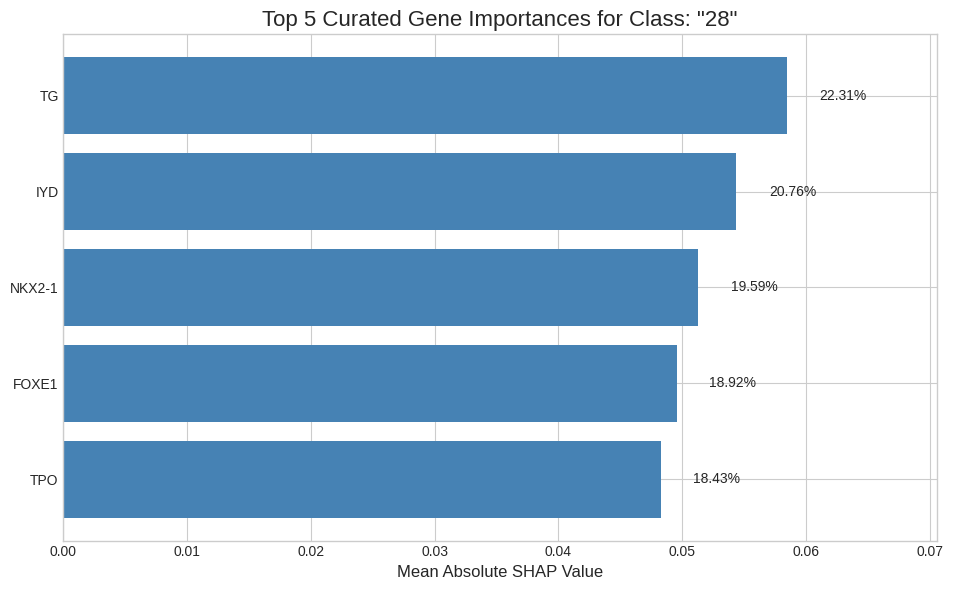

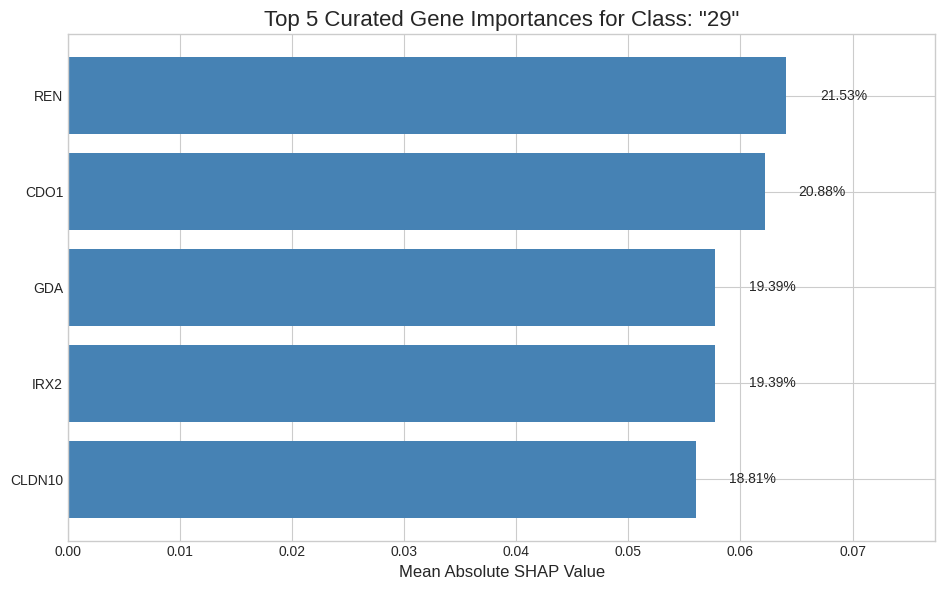

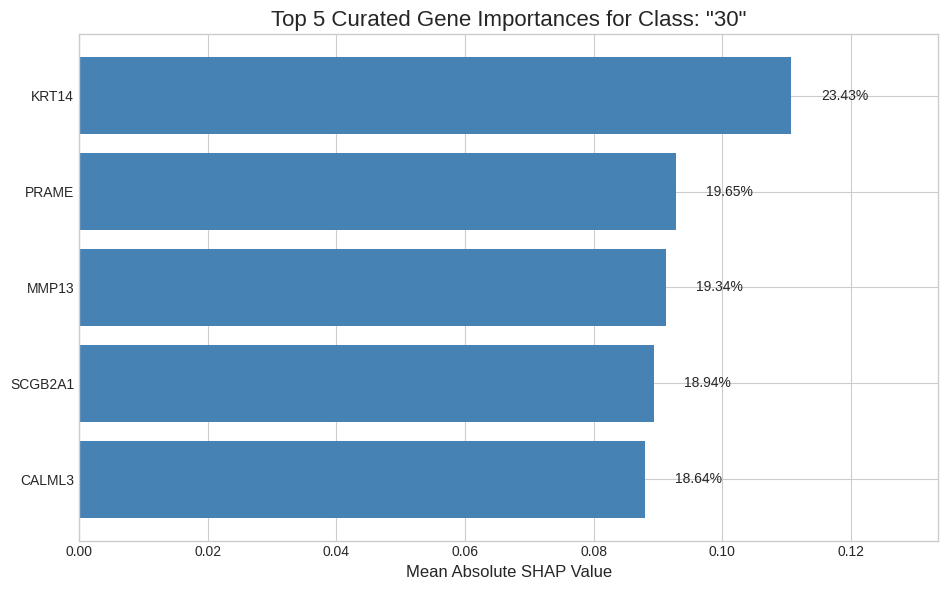

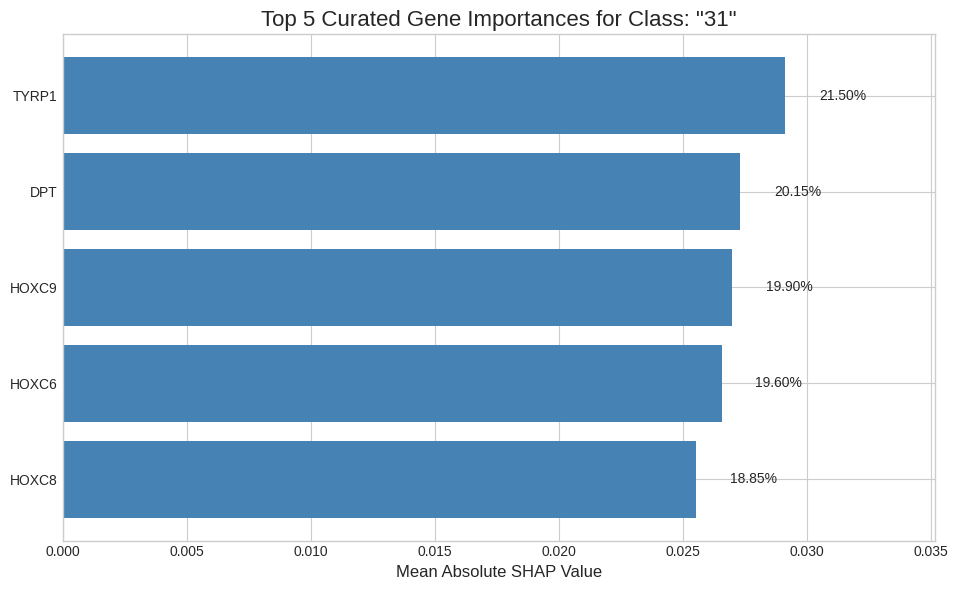

In [21]:

for class_name, genes_to_plot in top_genes_per_class.items():

    # Find the index 'i' corresponding to the current class_name
    # This is needed to slice the correct part of the shap_values array
    i = list(class_names).index(class_name)

    # 1. Get the SHAP values for the current class
    class_shap_values = shap_values[:, :, i]

    # 2. Create the Series of mean absolute SHAP values for ALL features
    # We still need this to look up the values for our selected genes
    feature_importance_series = pd.Series(
        np.abs(class_shap_values).mean(axis=0),
        index=X.columns
    )

    # Select the importance scores ONLY for your pre-selected genes
    importance_for_selected_genes = feature_importance_series.loc[genes_to_plot]

    # 4. Sort these values for a clean plot (most important at the top)
    sorted_importance = importance_for_selected_genes.sort_values(ascending=False)

    # 5. Calculate percentages based ONLY on the sum of these selected genes
    total_importance_selected = sorted_importance.sum()
    percentages = (sorted_importance / total_importance_selected) * 100

    # 6. Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(sorted_importance.index, sorted_importance.values, color='steelblue')
    ax.invert_yaxis()

    # 7. Annotate each bar with its percentage
    for bar, percentage in zip(bars, percentages):
        ax.text(
            bar.get_width() + (total_importance_selected * 0.01),
            bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%',
            va='center',
            ha='left'
        )

    # --- Formatting ---
    ax.set_title(f'Top {len(genes_to_plot)} Curated Gene Importances for Class: "{class_name}"', fontsize=16)
    ax.set_xlabel('Mean Absolute SHAP Value', fontsize=12)
    plt.tight_layout()
    ax.set_xlim(right=ax.get_xlim()[1] * 1.15) # Make room for annotations

    plt.show()

